# *Projeto Final - Gestão financeira empresarial e gestão financeira de gastos pessoais*

### Resolver um problema
- Seguinte problema, evitar que as finanças cheguem no vermelho.
  - Prever gastos futuros, ganhos futuros, Prever Antecipado quando estiver com risco de falir a empresa.
  - sim ou nao, regressão logistica ou random forest
  - regressão linear
  - Analisar se no seguinte mês vai apertar ou vai aliviar as contas.
  - regressão logistica ou random forest


### Importando o pandas

In [ ]:
# importando o pandas
import pandas as pd

## *Criando variáveis com as url do dataset no git*

### Regressão Linear

In [ ]:
# Criando variavel com o url para carregar o dataset
url_regressao = 'https://raw.githubusercontent.com/lucasm9140/machinelearning-datasets/79bfc192b3a418d9c2c68fa4c5826a39849130d5/Financials%20company.csv'

### Previsão - regressão logística ou ramdon forest

In [ ]:
# Criando variavel com o url para carregar o dataset
url_previsao = 'https://raw.githubusercontent.com/lucasm9140/machinelearning-datasets/79bfc192b3a418d9c2c68fa4c5826a39849130d5/data%5B1%5D.csv'

## *Carregando o dataset pela variavel url´s*

In [ ]:
# Carregando o dataset com a variavel url
df_regressao = pd.read_csv(url_regressao)
df_previsao = pd.read_csv(url_previsao)

# *Mostrando as 5 primeiras linhas em dataframe Da regressão linear*

In [ ]:
# Mostrando as 5 primeiras linhas do dataset em dataframe
df_regressao.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


# *Renomeando as colunas*

In [ ]:
# Renomear as colunas restantes
df_regressao.rename(columns={
    'Product': 'produto',
    'Discount Band': 'faixa_desconto',
    'Units Sold': 'unidades_vendidas',
    'Manufacturing Price': 'preco_fabricacao',
    'Sale Price': 'preco_venda',
    'Gross Sales': 'vendas_brutas',
    'Discounts': 'descontos',
    ' Sales ': 'vendas',
    'COGS': 'custo_mercadoria_vendida',  # COGS = Cost of Goods Sold
    'Profit': 'lucro',
    'Month Name': 'nome_mes'
}, inplace=True)

# *Printando as colunas*

In [ ]:
# Mostra na tela as colunas
print(df_regressao.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [ ]:
# Mostra na tela as 5 primeiras linhas em dataframe
df_regressao.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


## *Remover espaços em branco dos nomes das colunas e remover colunas que não serão necessárias*

In [ ]:
# Remover espaços em branco dos nomes das colunas
df_regressao.columns = df_regressao.columns.str.strip()

# Renomear as colunas restantes
df_regressao.rename(columns={
    'Segment': 'segmento',
    'Country': 'pais',
    'Product': 'produto',
    'Discount Band': 'faixa_desconto',
    'Units Sold': 'unidades_vendidas',
    'Manufacturing Price': 'preco_fabricacao',
    'Sale Price': 'preco_venda',
    'Gross Sales': 'vendas_brutas',
    'Discounts': 'descontos',
    'Sales': 'vendas',
    'COGS': 'custo_mercadoria_vendida',  # COGS = Cost of Goods Sold
    'Profit': 'lucro',
    'Date': 'data',
    'Month Number': 'mes_numero',
    'Month Name': 'nome_mes',
    'Year': 'ano'
}, inplace=True)

## *Mostrando colunas do dataset regressão linear traduzidas(renomeadas)*

In [ ]:
# Mostrando colunas
print(df_regressao.columns)

Index(['segmento', 'pais', 'produto', 'faixa_desconto', 'unidades_vendidas',
       'preco_fabricacao', 'preco_venda', 'vendas_brutas', 'descontos',
       'vendas', 'custo_mercadoria_vendida', 'lucro', 'data', 'mes_numero',
       'nome_mes', 'ano'],
      dtype='object')


In [ ]:
# Mostrando as 5 primeiras linhas
df_regressao.head()

,segmento,pais,produto,faixa_desconto,unidades_vendidas,preco_fabricacao,preco_venda,vendas_brutas,descontos,vendas,custo_mercadoria_vendida,lucro,data,mes_numero,nome_mes,ano
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


# *DATASET DE PREVISÃO* - RANDONFOREST

### mostrando colunas do dataset

In [ ]:
# Mostrando colunas do outro dataset
print(df_previsao.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

## Remover espaços extras nas colunas e traduzir os nomes das colunas, ao final mostra na tela as colunas.

In [ ]:
# Remover espaços extras nas colunas
df_previsao.columns = df_previsao.columns.str.strip()

# Traduzir os nomes das colunas
df_previsao.rename(columns={
    'Bankrupt?': 'faliu',
    'ROA(C) before interest and depreciation before interest': 'ROA(C) antes juros e depreciação antes de juros',
    'ROA(A) before interest and % after tax': 'ROA(A) antes juros e % após imposto',
    'ROA(B) before interest and depreciation after tax': 'ROA(B) antes juros e depreciação após imposto',
    'Operating Gross Margin': 'margem_bruta_operacional',
    'Realized Sales Gross Margin': 'margem_bruta_vendas_realizadas',
    'Operating Profit Rate': 'taxa_lucro_operacional',
    'Pre-tax net Interest Rate': 'taxa_juros_líquida_antes_imposto',
    'After-tax net Interest Rate': 'taxa_juros_líquida_após_imposto',
    'Non-industry income and expenditure/revenue': 'receita_despesa_extra_industria',
    'Continuous interest rate (after tax)': 'taxa_juros_contínua_após_imposto',
    'Operating Expense Rate': 'taxa_despesas_operacionais',
    'Research and development expense rate': 'taxa_despesas_pesquisa_desenvolvimento',
    'Cash flow rate': 'taxa_fluxo_caixa',
    'Interest-bearing debt interest rate': 'taxa_juros_divida_com_juros',
    'Tax rate (A)': 'taxa_imposto(A)',
    'Net Value Per Share (B)': 'valor_liquido_por_acao(B)',
    'Net Value Per Share (A)': 'valor_liquido_por_acao(A)',
    'Net Value Per Share (C)': 'valor_liquido_por_acao(C)',
    'Persistent EPS in the Last Four Seasons': 'EPS_persistente_ultimas_4_temporadas',
    'Cash Flow Per Share': 'fluxo_caixa_por_acao',
    'Revenue Per Share (Yuan ¥)': 'receita_por_acao(Yuan ¥)',
    'Operating Profit Per Share (Yuan ¥)': 'lucro_operacional_por_acao(Yuan ¥)',
    'Per Share Net profit before tax (Yuan ¥)': 'lucro_liquido_por_acao_antes_imposto(Yuan ¥)',
    'Realized Sales Gross Profit Growth Rate': 'taxa_crescimento_lucro_bruto_vendas_realizadas',
    'Operating Profit Growth Rate': 'taxa_crescimento_lucro_operacional',
    'After-tax Net Profit Growth Rate': 'taxa_crescimento_lucro_liquido_apos_imposto',
    'Regular Net Profit Growth Rate': 'taxa_crescimento_lucro_liquido_regular',
    'Continuous Net Profit Growth Rate': 'taxa_crescimento_lucro_liquido_continuo',
    'Total Asset Growth Rate': 'taxa_crescimento_total_ativos',
    'Net Value Growth Rate': 'taxa_crescimento_valor_liquido',
    'Total Asset Return Growth Rate Ratio': 'taxa_crescimento_retornos_total_ativos',
    'Cash Reinvestment %': 'reinversao_caixa_%',
    'Current Ratio': 'indice_liquidez_corrente',
    'Quick Ratio': 'indice_liquidez_seca',
    'Interest Expense Ratio': 'indice_despesas_juros',
    'Total debt/Total net worth': 'divida_total/valor_liquido_total',
    'Debt ratio %': 'indice_endividamento_%',
    'Net worth/Assets': 'valor_liquido/ativos',
    'Long-term fund suitability ratio (A)': 'indice_adequacao_fundos_longo_prazo(A)',
    'Borrowing dependency': 'dependencia_emprestimos',
    'Contingent liabilities/Net worth': 'passivos_contingentes/valor_liquido',
    'Operating profit/Paid-in capital': 'lucro_operacional/capital_integralizado',
    'Net profit before tax/Paid-in capital': 'lucro_liquido_antes_imposto/capital_integralizado',
    'Inventory and accounts receivable/Net value': 'estoque_e_contas_receber/valor_liquido',
    'Total Asset Turnover': 'giro_total_ativos',
    'Accounts Receivable Turnover': 'giro_contas_receber',
    'Average Collection Days': 'dias_medios_recebimento',
    'Inventory Turnover Rate (times)': 'giro_estoques(vezes)',
    'Fixed Assets Turnover Frequency': 'frequencia_giro_ativos_fixos',
    'Net Worth Turnover Rate (times)': 'giro_valor_liquido(vezes)',
    'Revenue per person': 'receita_por_pessoa',
    'Operating profit per person': 'lucro_operacional_por_pessoa',
    'Allocation rate per person': 'taxa_alocacao_por_pessoa',
    'Working Capital to Total Assets': 'capital_giro/ativos_totais',
    'Quick Assets/Total Assets': 'ativos_rapidos/ativos_totais',
    'Current Assets/Total Assets': 'ativos_correntes/ativos_totais',
    'Cash/Total Assets': 'caixa/ativos_totais',
    'Quick Assets/Current Liability': 'ativos_rapidos/passivo_corrente',
    'Cash/Current Liability': 'caixa/passivo_corrente',
    'Current Liability to Assets': 'passivo_corrente/ativos',
    'Operating Funds to Liability': 'fundos_operacionais/passivo',
    'Inventory/Working Capital': 'estoque/capital_giro',
    'Inventory/Current Liability': 'estoque/passivo_corrente',
    'Current Liabilities/Liability': 'passivo_corrente/passivo',
    'Working Capital/Equity': 'capital_giro/patrimonio_liquido',
    'Current Liabilities/Equity': 'passivo_corrente/patrimonio_liquido',
    'Long-term Liability to Current Assets': 'passivo_longo_prazo/ativos_correntes',
    'Retained Earnings to Total Assets': 'lucros_retidos/ativos_totais',
    'Total income/Total expense': 'receita_total/despesa_total',
    'Total expense/Assets': 'despesa_total/ativos',
    'Current Asset Turnover Rate': 'giro_ativos_correntes',
    'Quick Asset Turnover Rate': 'giro_ativos_rapidos',
    'Working capitcal Turnover Rate': 'giro_capital_giro',
    'Cash Turnover Rate': 'giro_caixa',
    'Cash Flow to Sales': 'fluxo_caixa/vendas',
    'Fixed Assets to Assets': 'ativos_fixos/ativos',
    'Current Liability to Liability': 'passivo_corrente/passivo',
    'Current Liability to Equity': 'passivo_corrente/patrimonio_liquido',
    'Equity to Long-term Liability': 'patrimonio_liquido/passivo_longo_prazo',
    'Cash Flow to Total Assets': 'fluxo_caixa/ativos_totais',
    'Cash Flow to Liability': 'fluxo_caixa/passivo',
    'CFO to Assets': 'CFO/ativos',
    'Cash Flow to Equity': 'fluxo_caixa/patrimonio_liquido',
    'Current Liability to Current Assets': 'passivo_corrente/ativos_correntes',
    'Liability-Assets Flag': 'flag_passivo-ativos',
    'Net Income to Total Assets': 'rendimento_liquido/ativos_totais',
    'Total assets to GNP price': 'ativos_totais/preco_PIB',
    'No-credit Interval': 'intervalo_sem_credito',
    'Gross Profit to Sales': 'lucro_bruto/vendas',
    'Net Income to Stockholder\'s Equity': 'rendimento_liquido/patrimonio_acionistas',
    'Liability to Equity': 'passivo/patrimonio_liquido',
    'Degree of Financial Leverage (DFL)': 'grau_alavancagem_financeira(DFL)',
    'Interest Coverage Ratio (Interest expense to EBIT)': 'indice_cobertura_juros(despesas_juros/EBIT)',
    'Net Income Flag': 'flag_rendimento_liquido',
    'Equity to Liability': 'patrimonio_liquido/passivo'
}, inplace=True)

# Verificar os novos nomes das colunas
print(df_previsao.columns)


Index(['faliu', 'ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'valor_liquido_por_acao(B)', 'valor_liquido_por_acao(A)',
       'valor_liquido_por_acao(C)', 'EPS_persistente_ultimas_4_temporadas',
       'fluxo_caixa_por_acao', 'receita_por_acao(Yuan ¥)',
       'lucro_operacional_por_acao(Yuan ¥)',
       'lucro_liquido_por_acao_antes_imposto(Yuan ¥)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_cr

### Colunas Removidas

In [ ]:
# Aqui está uma lista das colunas para remover
colunas_para_remover = [
    'valor_liquido_por_acao(B)',
    'valor_liquido_por_acao(A)',
    'valor_liquido_por_acao(C)',
    'EPS_persistente_ultimas_4_temporadas',
    'fluxo_caixa_por_acao',
    'receita_por_acao(Yuan ¥)',
    'lucro_operacional_por_acao(Yuan ¥)',
    'lucro_liquido_por_acao_antes_imposto(Yuan ¥)',
    'receita_por_pessoa',
    'lucro_operacional_por_pessoa',
    'taxa_alocacao_por_pessoa',
    'patrimonio_liquido/passivo',
    'passivo_corrente/passivo',
    'passivo_corrente/patrimonio_liquido',
    'patrimonio_liquido/passivo_longo_prazo',
    'fluxo_caixa/patrimonio_liquido',
    'passivo_corrente/ativos_correntes',
    'passivo_corrente/valor_liquido',
    'taxa_crescimento_lucro_liquido_regular',
    'taxa_crescimento_lucro_liquido_continuo',
    'taxa_crescimento_valor_liquido',
    'taxa_crescimento_retornos_total_ativos',
    'giro_capital_giro',
    'giro_ativos_correntes',
    'giro_ativos_rapidos',
    'giro_caixa',
    'passivos_contingentes/valor_liquido',
    'indice_adequacao_fundos_longo_prazo(A)',
    'giro_total_ativos',
    'fluxo_caixa/vendas',
    'rendimento_liquido/ativos_totais',
    'ativos_totais/preco_PIB',
    'lucro_bruto/vendas',
    'grau_alavancagem_financeira(DFL)',
    'indice_cobertura_juros(despesas_juros/EBIT)',
    'passivo/patrimonio_liquido',
    'lucro_liquido_antes_imposto/capital_integralizado',
]

# Removendo as colunas do DataFrame
df_cleaned = df_previsao.drop(columns=colunas_para_remover, errors='ignore')

# Exibindo as colunas restantes
print("Colunas restantes após remoção:")
print(df_cleaned.columns)


Colunas restantes após remoção:
Index(['faliu', 'ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_

### Dataset previsão renomeado e transformado para dataframe e mostrando as 5 primeiras linhas

In [ ]:
df_previsao_cleaned = df_cleaned
df_previsao_cleaned.head()

,faliu,ROA(C) antes juros e depreciação antes de juros,ROA(A) antes juros e % após imposto,ROA(B) antes juros e depreciação após imposto,margem_bruta_operacional,margem_bruta_vendas_realizadas,taxa_lucro_operacional,taxa_juros_líquida_antes_imposto,taxa_juros_líquida_após_imposto,receita_despesa_extra_industria,...,receita_total/despesa_total,despesa_total/ativos,ativos_fixos/ativos,fluxo_caixa/ativos_totais,fluxo_caixa/passivo,CFO/ativos,flag_passivo-ativos,intervalo_sem_credito,rendimento_liquido/patrimonio_acionistas,flag_rendimento_liquido
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.002022,0.064856,0.424206,0.637555,0.458609,0.520382,0,0.622879,0.827890,1
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.002226,0.025516,0.468828,0.641100,0.459001,0.567101,0,0.623652,0.839969,1
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.002060,0.021387,0.276179,0.642765,0.459254,0.538491,0,0.623841,0.836774,1
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.001831,0.024161,0.559144,0.579039,0.448518,0.604105,0,0.622929,0.834697,1
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.002224,0.026385,0.309555,0.622374,0.454411,0.578469,0,0.623521,0.839973,1


- O ROA (Retorno sobre Ativos) é uma métrica que indica a rentabilidade de um empreendimento ou investimento, usando ativos como régua e inst. de comparação

### Mostrando todas as linhas e colunas do Dataframe

In [ ]:
df_previsao_cleaned.shape

(6819, 58)

### Tipos de dados do dataframe

In [ ]:
df_previsao_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 58 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   faliu                                            6819 non-null   int64  
 1   ROA(C) antes juros e depreciação antes de juros  6819 non-null   float64
 2   ROA(A) antes juros e % após imposto              6819 non-null   float64
 3   ROA(B) antes juros e depreciação após imposto    6819 non-null   float64
 4   margem_bruta_operacional                         6819 non-null   float64
 5   margem_bruta_vendas_realizadas                   6819 non-null   float64
 6   taxa_lucro_operacional                           6819 non-null   float64
 7   taxa_juros_líquida_antes_imposto                 6819 non-null   float64
 8   taxa_juros_líquida_após_imposto                  6819 non-null   float64
 9   receita_despesa_extra_industri

### Contar o número de valores ausentes (nulos) em cada coluna do DataFrame.

In [ ]:
print(df_previsao_cleaned.isnull().sum())

faliu                                              0
ROA(C) antes juros e depreciação antes de juros    0
ROA(A) antes juros e % após imposto                0
ROA(B) antes juros e depreciação após imposto      0
margem_bruta_operacional                           0
margem_bruta_vendas_realizadas                     0
taxa_lucro_operacional                             0
taxa_juros_líquida_antes_imposto                   0
taxa_juros_líquida_após_imposto                    0
receita_despesa_extra_industria                    0
taxa_juros_contínua_após_imposto                   0
taxa_despesas_operacionais                         0
taxa_despesas_pesquisa_desenvolvimento             0
taxa_fluxo_caixa                                   0
taxa_juros_divida_com_juros                        0
taxa_imposto(A)                                    0
taxa_crescimento_lucro_bruto_vendas_realizadas     0
taxa_crescimento_lucro_operacional                 0
taxa_crescimento_lucro_liquido_apos_imposto   

### Esta função é usada para converter variáveis ​​categóricas em um formato codificado one-hot
- A codificação one-hot é uma técnica essencial no pré-processamento de dados por vários motivos. Ele transforma dados categóricos em um formato que os modelos de machine learning podem entender e usar facilmente.

In [ ]:
df = pd.get_dummies(df_previsao_cleaned, columns=['faliu'], drop_first=True)

### Informações gerais do dataframe

In [ ]:
print(df_previsao_cleaned.info)

<bound method DataFrame.info of       faliu  ROA(C) antes juros e depreciação antes de juros  \
0         1                                         0.370594   
1         1                                         0.464291   
2         1                                         0.426071   
3         1                                         0.399844   
4         1                                         0.465022   
...     ...                                              ...   
6814      0                                         0.493687   
6815      0                                         0.475162   
6816      0                                         0.472725   
6817      0                                         0.506264   
6818      0                                         0.493053   

      ROA(A) antes juros e % após imposto  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                  

# Dataframe regressão linear

### Mostrando as 5 primeiras linhas do dataframe de regressão linear

In [ ]:
df_regressao.head()

,segmento,pais,produto,faixa_desconto,unidades_vendidas,preco_fabricacao,preco_venda,vendas_brutas,descontos,vendas,custo_mercadoria_vendida,lucro,data,mes_numero,nome_mes,ano
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


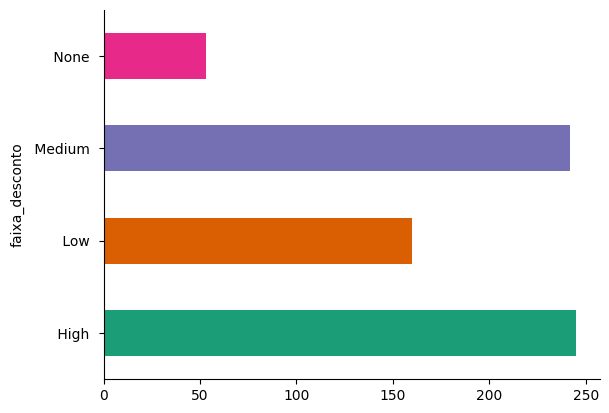

In [ ]:
# @title faixa_desconto

from matplotlib import pyplot as plt
import seaborn as sns
df_regressao.groupby('faixa_desconto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(df_regressao.info)

<bound method DataFrame.info of              segmento                      pais      produto faixa_desconto  \
0          Government                    Canada   Carretera           None    
1          Government                   Germany   Carretera           None    
2           Midmarket                    France   Carretera           None    
3           Midmarket                   Germany   Carretera           None    
4           Midmarket                    Mexico   Carretera           None    
..                ...                       ...          ...            ...   
695    Small Business                    France    Amarilla           High    
696    Small Business                    Mexico    Amarilla           High    
697        Government                    Mexico     Montana           High    
698        Government                    Canada       Paseo           High    
699  Channel Partners  United States of America         VTT           High    

    unidades_vendid

In [ ]:
df_regressao_clean = df_regressao.drop(columns=['segmento','pais', 'produto'])

In [ ]:
df_regressao_clean.head()

,faixa_desconto,unidades_vendidas,preco_fabricacao,preco_venda,vendas_brutas,descontos,vendas,custo_mercadoria_vendida,lucro,data,mes_numero,nome_mes,ano
0,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


# Mesclando os dataframe

In [ ]:
merged_df_regressao_previsao = pd.concat([df_previsao_cleaned, df_regressao_clean], axis=1)


In [ ]:
merged_df_regressao_previsao.head()

,faliu,ROA(C) antes juros e depreciação antes de juros,ROA(A) antes juros e % após imposto,ROA(B) antes juros e depreciação após imposto,margem_bruta_operacional,margem_bruta_vendas_realizadas,taxa_lucro_operacional,taxa_juros_líquida_antes_imposto,taxa_juros_líquida_após_imposto,receita_despesa_extra_industria,...,preco_venda,vendas_brutas,descontos,vendas,custo_mercadoria_vendida,lucro,data,mes_numero,nome_mes,ano
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1.0,January,2014.0
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1.0,January,2014.0
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6.0,June,2014.0
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6.0,June,2014.0
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6.0,June,2014.0


### Conferindo as colunas do Novo dataframe

In [ ]:
print(merged_df_regressao_previsao.columns)

Index(['faliu', 'ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_liquido/ativos',
       'depende

In [ ]:
merged_df_regressao_previsao.head(3)

,faliu,ROA(C) antes juros e depreciação antes de juros,ROA(A) antes juros e % após imposto,ROA(B) antes juros e depreciação após imposto,margem_bruta_operacional,margem_bruta_vendas_realizadas,taxa_lucro_operacional,taxa_juros_líquida_antes_imposto,taxa_juros_líquida_após_imposto,receita_despesa_extra_industria,...,preco_venda,vendas_brutas,descontos,vendas,custo_mercadoria_vendida,lucro,data,mes_numero,nome_mes,ano
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1.0,January,2014.0
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1.0,January,2014.0
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6.0,June,2014.0


## Histogramas das colunas

Skipping column 'faixa_desconto' because it is not numeric.
Skipping column 'unidades_vendidas' because it is not numeric.
Skipping column 'preco_fabricacao' because it is not numeric.
Skipping column 'preco_venda' because it is not numeric.
Skipping column 'vendas_brutas' because it is not numeric.
Skipping column 'descontos' because it is not numeric.
Skipping column 'vendas' because it is not numeric.
Skipping column 'custo_mercadoria_vendida' because it is not numeric.
Skipping column 'lucro' because it is not numeric.
Skipping column 'data' because it is not numeric.
Skipping column 'nome_mes' because it is not numeric.


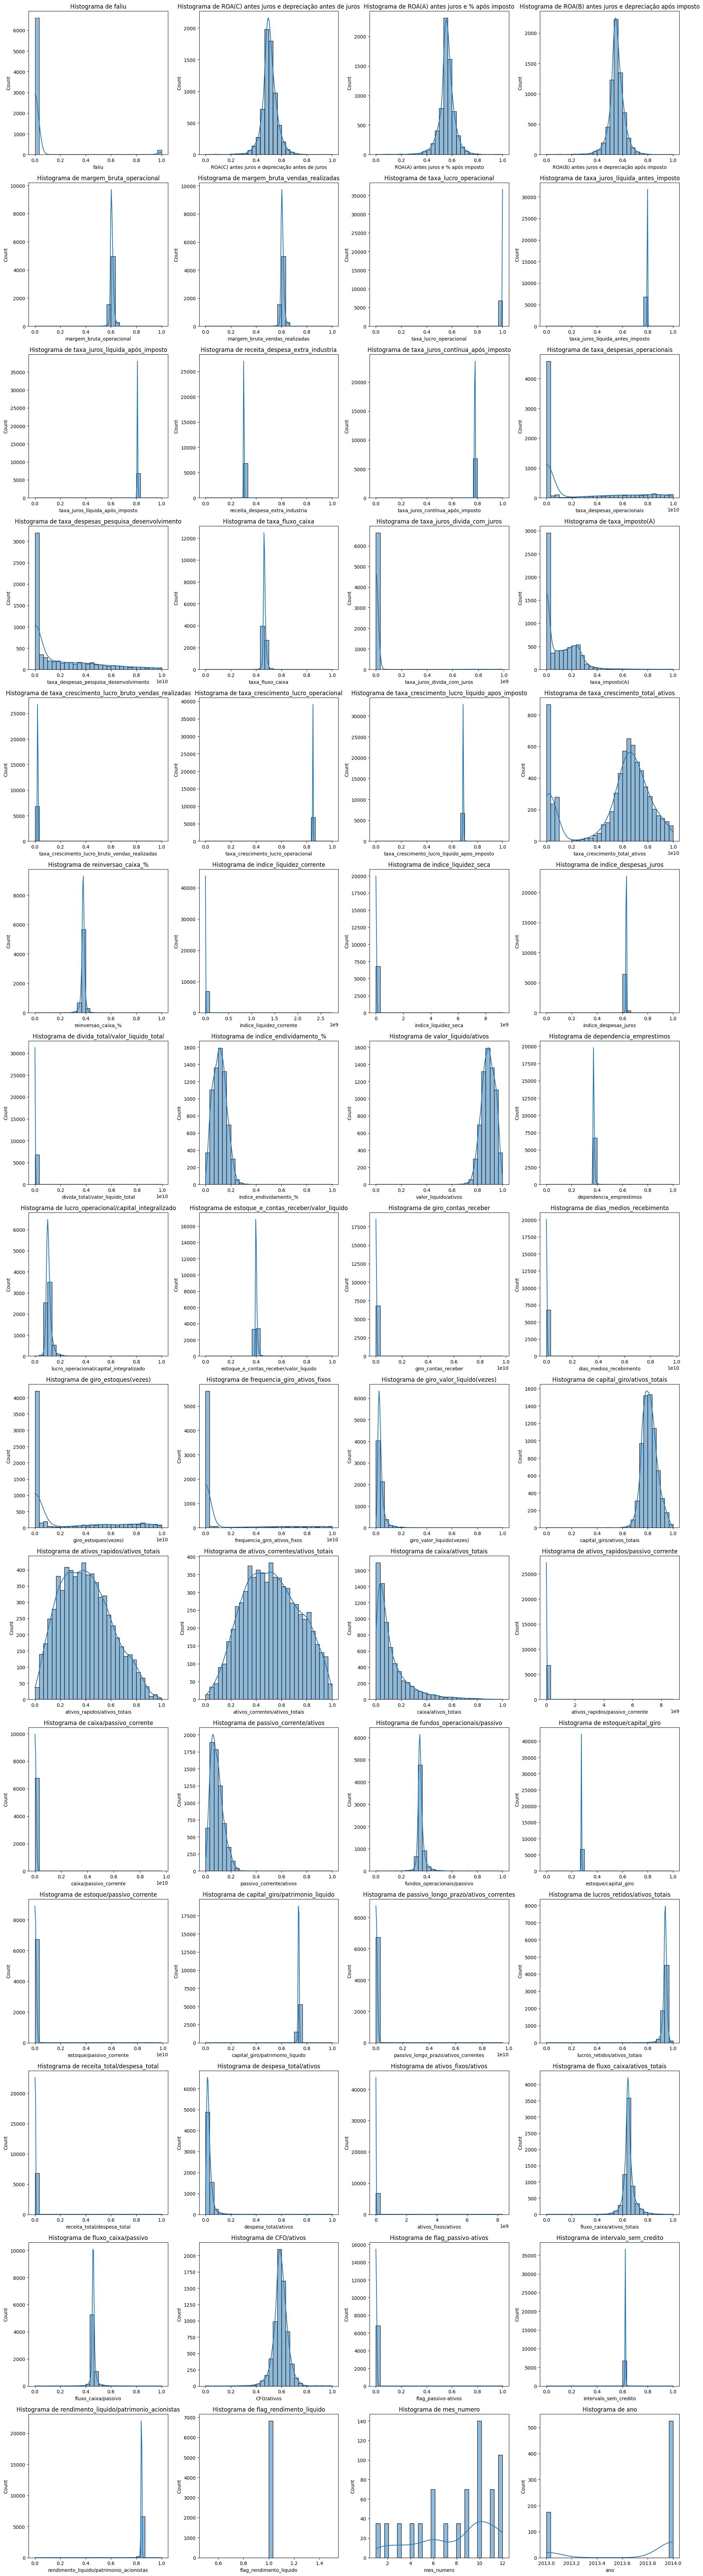

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Verifica valores infinitos e substitui-os por NaN
merged_df_regressao_previsao.replace([np.inf, -np.inf], np.nan, inplace=True)


# Calcula o número de linhas e colunas necessárias para as subparcelas
num_cols = merged_df_regressao_previsao.select_dtypes(include=np.number).shape[1] # Only count numeric columns
num_rows = int(np.ceil(num_cols / 4))  # Mantenha 4 colunas, ajuste as linhas

plt.figure(figsize=(20, 5 * num_rows))  # Ajuste a altura da figura com base nas linhas

#Reinicia o contador de plotagem
plot_index = 1

for i, column in enumerate(merged_df_regressao_previsao.columns):
        # Verifica se a coluna é numérica
    if pd.api.types.is_numeric_dtype(merged_df_regressao_previsao[column]):
        plt.subplot(num_rows, 4, plot_index)  # Use num_rows and plot_index
        # Força um número razoável de caixas
        sns.histplot(merged_df_regressao_previsao[column], kde=True, bins=30)
        plt.title(f'Histograma de {column}')
        plt.tight_layout()

        plot_index += 1  # Incrementa o contador do gráfico para colunas numéricas
    else:
        print(f"Skipping column '{column}' because it is not numeric.")

plt.show()

## Tipos dos valores das colunas do dataframe mesclado

In [ ]:
print(merged_df_regressao_previsao.dtypes)

faliu                                                int64
ROA(C) antes juros e depreciação antes de juros    float64
ROA(A) antes juros e % após imposto                float64
ROA(B) antes juros e depreciação após imposto      float64
margem_bruta_operacional                           float64
                                                    ...   
lucro                                               object
data                                                object
mes_numero                                         float64
nome_mes                                            object
ano                                                float64
Length: 71, dtype: object


## Mostrando as informações de todas as colunas

In [ ]:
merged_df_regressao_previsao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   faliu                                            6819 non-null   int64  
 1   ROA(C) antes juros e depreciação antes de juros  6819 non-null   float64
 2   ROA(A) antes juros e % após imposto              6819 non-null   float64
 3   ROA(B) antes juros e depreciação após imposto    6819 non-null   float64
 4   margem_bruta_operacional                         6819 non-null   float64
 5   margem_bruta_vendas_realizadas                   6819 non-null   float64
 6   taxa_lucro_operacional                           6819 non-null   float64
 7   taxa_juros_líquida_antes_imposto                 6819 non-null   float64
 8   taxa_juros_líquida_após_imposto                  6819 non-null   float64
 9   receita_despesa_extra_industri

In [ ]:
merged_df_regressao_previsao.describe()

,faliu,ROA(C) antes juros e depreciação antes de juros,ROA(A) antes juros e % após imposto,ROA(B) antes juros e depreciação após imposto,margem_bruta_operacional,margem_bruta_vendas_realizadas,taxa_lucro_operacional,taxa_juros_líquida_antes_imposto,taxa_juros_líquida_após_imposto,receita_despesa_extra_industria,...,ativos_fixos/ativos,fluxo_caixa/ativos_totais,fluxo_caixa/passivo,CFO/ativos,flag_passivo-ativos,intervalo_sem_credito,rendimento_liquido/patrimonio_acionistas,flag_rendimento_liquido,mes_numero,ano
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,700.000000,700.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,1.220121e+06,0.649731,0.461849,0.593415,0.001173,0.623915,0.840402,1.0,7.900000,2013.750000
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,1.007542e+08,0.047372,0.029943,0.058561,0.034234,0.012290,0.014523,0.0,3.377321,0.433322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,2013.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,8.536037e-02,0.633265,0.457116,0.565987,0.000000,0.623636,0.840115,1.0,5.750000,2013.750000
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,1.968810e-01,0.645366,0.459750,0.593266,0.000000,0.623879,0.841179,1.0,9.000000,2014.000000
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,3.722000e-01,0.663062,0.464236,0.624769,0.000000,0.624168,0.842357,1.0,10.250000,2014.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.320000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,12.000000,2014.000000


## Salvar em CSV

In [ ]:
# Salvar em um arquivo CSV
merged_df_regressao_previsao.to_csv('dataset.csv', index=False)

## Salvar em Json

In [ ]:
#salva em json
merged_df_regressao_previsao.to_json('gestao_emp_pes.json', orient='records', lines=True)

# *Treinando o Modelo* Com Random Forest


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


# Passo 1: Separar dados para os dois modelos (Classificação e Regressão)

# Modelo de Classificação: prever se vai falir
X_class = merged_df_regressao_previsao[['ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_liquido/ativos',
       'dependencia_emprestimos', 'lucro_operacional/capital_integralizado',
       'estoque_e_contas_receber/valor_liquido', 'giro_contas_receber',
       'dias_medios_recebimento', 'giro_estoques(vezes)',
       'frequencia_giro_ativos_fixos', 'giro_valor_liquido(vezes)',
       'capital_giro/ativos_totais', 'ativos_rapidos/ativos_totais',
       'ativos_correntes/ativos_totais', 'caixa/ativos_totais',
       'ativos_rapidos/passivo_corrente', 'caixa/passivo_corrente',
       'passivo_corrente/ativos', 'fundos_operacionais/passivo',
       'estoque/capital_giro', 'estoque/passivo_corrente',
       'capital_giro/patrimonio_liquido',
       'passivo_longo_prazo/ativos_correntes', 'lucros_retidos/ativos_totais',
       'receita_total/despesa_total', 'despesa_total/ativos',
       'ativos_fixos/ativos', 'fluxo_caixa/ativos_totais',
       'fluxo_caixa/passivo', 'CFO/ativos', 'flag_passivo-ativos',
       'intervalo_sem_credito', 'rendimento_liquido/patrimonio_acionistas',
       'flag_rendimento_liquido']]  # Features
y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de classificação)

# Modelo de Regressão: prever gastos futuros
#X_reg = df_final[['gastos_mensais', 'receitas_mensais', 'divida', 'patrimonio']]  # Features (mesmas ou diferentes)
#y_reg = df_final['gastos_futuros']  # Variável dependente (contínua, para regressão)

# Dividir os dados em treino e teste para ambos os modelos
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
#X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Passo 3: Treinar os dois modelos

# Modelo de Classificação (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class, y_train_class)

# Modelo de Regressão (Regressão Linear)
#reg = LinearRegression()
#reg.fit(X_train_reg, y_train_reg)

# Passo 4: Fazer previsões com ambos os modelos
# Previsões com o modelo de Classificação
y_pred_class = clf_rf.predict(X_test_class)

# Previsões com o modelo de Regressão
#y_pred_reg = reg.predict(X_test_reg)

# Passo 5: Avaliar ambos os modelos

# Avaliação do modelo de Classificação
print("Acurácia do modelo de classificação:", accuracy_score(y_test_class, y_pred_class))
print("Relatório de Classificação:\n", classification_report(y_test_class, y_pred_class))

# Avaliação do modelo de Regressão
#mse = mean_squared_error(y_test_reg, y_pred_reg)
#r2 = r2_score(y_test_reg, y_pred_reg)

#print(f'Erro Quadrático Médio (MSE) do modelo de regressão: {mse}')
#print(f'Coeficiente de Determinação (R²) do modelo de regressão: {r2}')


Acurácia do modelo de classificação: 0.9648093841642229
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.67      0.15      0.25        78

    accuracy                           0.96      2046
   macro avg       0.82      0.58      0.62      2046
weighted avg       0.96      0.96      0.95      2046



Acurácia do modelo de classificação: 0.9648093841642229
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.67      0.15      0.25        78

    accuracy                           0.96      2046
   macro avg       0.82      0.58      0.62      2046
weighted avg       0.96      0.96      0.95      2046.

# Esse relatório de classificação fornece uma visão detalhada do desempenho






# Interpretação geral do desempenho:
- Classe 0 (maioria): O modelo tem um desempenho excelente, com alta precisão (97%) e revocação (100%), resultando em um f1-score muito bom (98%).
- Classe 1 (minoria): O desempenho é muito ruim, com baixa precisão (67%) e revocação (15%), o que resulta em um f1-score baixo (25%). Isso indica que o modelo está tendo dificuldades para identificar corretamente as instâncias da  classe 1, que são poucas no conjunto de dados.
Possíveis causas e sugestões:
- Desbalanceamento de classes: O conjunto de dados é altamente desbalanceado, com muito mais instâncias da classe 0 do que da classe 1. Isso pode fazer com que o modelo seja tendencioso em favor da classe majoritária (classe 0), o que é refletido na baixa performance para a classe 1.
  - **Soluções possíveis:**
  - Reamostragem: Técnicas como oversampling (aumentar o número de instâncias da classe minoritária) ou undersampling (diminuir o número de instâncias da classe majoritária) podem ajudar.
  - Uso de métricas ajustadas: Em casos de classes desbalanceadas, pode ser interessante otimizar o modelo com base em métricas como F1-score ou usar uma abordagem que balanceie o erro entre as classes.
 - Uso de técnicas de aprendizado de máquina mais robustas para desbalanceamento: Algoritmos como Random Forest, XGBoost ou técnicas específicas de balanceamento de classes (como SMOTE) podem ajudar.
- Em resumo, o modelo apresenta um desempenho excelente para a classe majoritária, mas tem dificuldades significativas para a classe minoritária, provavelmente devido ao desbalanceamento no conjunto de dados.

# Nova tentativa

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear o conjunto de dados
smote = SMOTE(random_state=42)
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Treinar o modelo novamente com os dados balanceados
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)

# Fazer previsões com o modelo balanceado
y_pred_class_balanced = clf_rf.predict(X_test_class)

# Avaliar novamente
print("Acurácia do modelo balanceado:", accuracy_score(y_test_class, y_pred_class_balanced))
print("Relatório de Classificação do modelo balanceado:\n", classification_report(y_test_class, y_pred_class_balanced))


Acurácia do modelo balanceado: 0.9516129032258065
Relatório de Classificação do modelo balanceado:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1968
           1       0.39      0.49      0.43        78

    accuracy                           0.95      2046
   macro avg       0.69      0.73      0.70      2046
weighted avg       0.96      0.95      0.95      2046



In [ ]:
from sklearn.metrics import roc_auc_score

# AUC-ROC
roc_auc = roc_auc_score(y_test_class, clf_rf.predict_proba(X_test_class)[:, 1])
print(f'AUC-ROC: {roc_auc}')


AUC-ROC: 0.943591046487388


In [ ]:
# Importância das variáveis
importances = clf_rf.feature_importances_
indices = importances.argsort()[::-1]

# Exibir as variáveis mais importantes
print("Top 10 variáveis mais importantes para o modelo:")
for i in range(10):
    print(f'{X_class.columns[indices[i]]}: {importances[indices[i]]}')


Top 10 variáveis mais importantes para o modelo:
taxa_juros_líquida_após_imposto: 0.09223128619042742
lucros_retidos/ativos_totais: 0.06351021025648007
taxa_juros_líquida_antes_imposto: 0.061091424967857105
dependencia_emprestimos: 0.06008488087019764
divida_total/valor_liquido_total: 0.05507071947907199
ROA(B) antes juros e depreciação após imposto: 0.05501532057160467
taxa_juros_contínua_após_imposto: 0.04677431194632075
receita_despesa_extra_industria: 0.04399970703675819
ROA(A) antes juros e % após imposto: 0.04278065707211294
receita_total/despesa_total: 0.04273630173752057


# *Alternativas a testar*
Com o modelo balanceado, já obteve uma melhora significativa em relação ao modelo anterior, mas ainda existem algumas áreas a serem ajustadas.

## Análise do Modelo Balanceado
  - Classe 0 (não falir):
  - Precisão: 98%
  - Recall: 97%
  - F1-Score: 97%
- A classe 0 está se saindo muito bem, com altos índices de precisão, recall e F1-Score. Isso é esperado, dado que a classe 0 ainda representa a maioria das instâncias no conjunto de dados.

- Classe 1 (falir):
  - Precisão: 39%
  - Recall: 49%
  - F1-Score: 43%
- Apesar de uma melhora no recall (49%) em comparação com o modelo não balanceado (13%), o modelo ainda está tendo dificuldades para identificar corretamente a classe 1. Isso é visível no baixo valor de precisão (39%) e F1-Score (43%).

- A precisão ainda está baixa, indicando que muitas das predições feitas para a classe 1 são falsos positivos — ou seja, o modelo está prevendo "falir" quando na realidade a empresa não vai falir.



# Comparação com o primeiro relatório


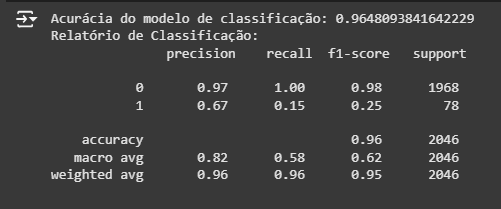

# *O que ainda pode ser melhorado?*
  - Embora o balanceamento tenha ajudado, o modelo ainda tem dificuldades em classificar corretamente as instâncias da classe 1. Aqui estão algumas sugestões para melhorar ainda mais o desempenho:

  
1. Ajustar os Pesos das Classes com Mais Precisão
  - O modelo balanceado com SMOTE já ajuda, mas você também pode ajustar os pesos das classes de forma mais cuidadosa. Às vezes, a distribuição balanceada não é suficiente, e você pode querer dar mais peso à classe 1 para forçar o modelo a focar mais nela.
  

In [ ]:
# Ajuste manual dos pesos das classes (exemplo)
weights = {0: 1, 1: 3}  # Aumentando o peso da classe 1

clf_rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=weights)
clf_rf_weighted.fit(X_train_class_balanced, y_train_class_balanced)

# Fazer previsões com o modelo com pesos ajustados
y_pred_class_weighted = clf_rf_weighted.predict(X_test_class)

# Avaliar novamente
print("Acurácia do modelo com pesos ajustados:", accuracy_score(y_test_class, y_pred_class_weighted))
print("Relatório de Classificação do modelo com pesos ajustados:\n", classification_report(y_test_class, y_pred_class_weighted))


Acurácia do modelo com pesos ajustados: 0.9535679374389052
Relatório de Classificação do modelo com pesos ajustados:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.41      0.49      0.44        78

    accuracy                           0.95      2046
   macro avg       0.69      0.73      0.71      2046
weighted avg       0.96      0.95      0.96      2046



2. Tentar Modelos Alternativos

- Embora o Random Forest seja um modelo poderoso, ele pode não ser o melhor para este caso específico de desbalanceamento de classes. Tente testar outros modelos, como:

- XGBoost: Um modelo mais robusto para dados desbalanceados.
Gradient Boosting: Outra técnica que pode melhorar o desempenho em classes desbalanceadas.
Modelos de Regressão Logística com Regularização: Embora simples, pode ser útil quando ajustado com regularização para desbalanceamento.

3. Melhorar o Balanceamento com SMOTE Variantes
Embora o SMOTE tenha dado algum resultado, você pode tentar variantes do SMOTE, como o SMOTENC (para variáveis categóricas) ou o SMOTE Tomek links (que combina SMOTE com remoção de exemplos conflitantes).

# Oversampling
- O que essa técnica faz é basicamente aumentar o número de exemplos da classe minoritária, no nosso caso seria a classe 1. Existem vários métodos que fazem isso de formas diferentes, mas aqui nos concentraremos no SMOTE (Synthetic Minority Oversampling Technique)¹.

- Basicamente, o que o SMOTE faz é gerar novos exemplos da classe minoritária através de interpolação entre os pontos mais próximos.

# Undersampling
- Enquanto o oversampling aumenta a quantidade de exemplos da classe minoritária, o undersampling faz o contrário: ele diminui a quantidade de exemplos da classe majoritária. Um dos métodos mais utilizados é chamado de ENN (Edited Nearest Neighbours)⁴.

## *Ajuste Fino no SMOTE*
- Você pode ajustar a quantidade de amostras sintéticas geradas com o SMOTE. Em vez de gerar a mesma quantidade de amostras da classe 1 que a classe 0, você pode tentar gerar um número menor de amostras sintéticas.

In [ ]:
# Ajustar SMOTE com diferentes níveis de over-sampling
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Gera 80% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Treinar novamente
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)
y_pred_class_balanced = clf_rf.predict(X_test_class)

print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))


Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.53      0.47        78

    accuracy                           0.95      2046
   macro avg       0.70      0.75      0.72      2046
weighted avg       0.96      0.95      0.96      2046



In [ ]:
# Ajustar SMOTE com diferentes níveis de over-sampling
smote = SMOTE(sampling_strategy=0.65, random_state=42)  # Gera 65% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Treinar novamente
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)
y_pred_class_balanced = clf_rf.predict(X_test_class)

print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))

Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.44      0.51      0.48        78

    accuracy                           0.96      2046
   macro avg       0.71      0.74      0.73      2046
weighted avg       0.96      0.96      0.96      2046



In [ ]:
# Ajuste manual dos pesos das classes (exemplo)
weights = {0: 1, 1: 5}  # Aumentando o peso da classe 1

clf_rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=weights)
clf_rf_weighted.fit(X_train_class_balanced, y_train_class_balanced)

# Fazer previsões com o modelo com pesos ajustados
y_pred_class_weighted = clf_rf_weighted.predict(X_test_class)

# Avaliar novamente
print("Acurácia do modelo com pesos ajustados:", accuracy_score(y_test_class, y_pred_class_weighted))
print("Relatório de Classificação do modelo com pesos ajustados:\n", classification_report(y_test_class, y_pred_class_weighted))

Acurácia do modelo com pesos ajustados: 0.9530791788856305
Relatório de Classificação do modelo com pesos ajustados:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.40      0.44      0.41        78

    accuracy                           0.95      2046
   macro avg       0.69      0.70      0.70      2046
weighted avg       0.96      0.95      0.95      2046



In [ ]:
# Ajuste manual dos pesos das classes (exemplo)
weights = {0: 1, 1: 3}  # Aumentando o peso da classe 1

clf_rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=weights)
clf_rf_weighted.fit(X_train_class_balanced, y_train_class_balanced)

# Fazer previsões com o modelo com pesos ajustados
y_pred_class_weighted = clf_rf_weighted.predict(X_test_class)

# Avaliar novamente
print("Acurácia do modelo com pesos ajustados:", accuracy_score(y_test_class, y_pred_class_weighted))
print("Relatório de Classificação do modelo com pesos ajustados:\n", classification_report(y_test_class, y_pred_class_weighted))

Acurácia do modelo com pesos ajustados: 0.9521016617790812
Relatório de Classificação do modelo com pesos ajustados:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.38      0.42      0.40        78

    accuracy                           0.95      2046
   macro avg       0.68      0.70      0.69      2046
weighted avg       0.95      0.95      0.95      2046



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test_class, clf_rf.predict_proba(X_test_class)[:, 1])
print(f'AUC-ROC: {roc_auc}')


AUC-ROC: 0.9453857879924953


# *O Problema do Desbalanceamento de Classes*
- Quando você tem um modelo de classificação, ele tenta prever uma determinada classe (por exemplo, se a empresa vai falir ou não) com base em características dos dados (como indicadores financeiros). No entanto, se uma classe (como "falir") for muito menor que a outra (como "não falir"), o modelo pode acabar ignorando a classe pequena, porque "não vale a pena" para ele gastar recursos aprendendo sobre algo tão raro.

- Por exemplo, se 95% dos dados dizem "não falir" e 5% dizem "falir", o modelo pode aprender muito bem a prever "não falir" (porque é o que aparece mais vezes) e errar nas poucas instâncias de "falir".

# *O que são "Pesos das Classes"?*
O ajuste de pesos das classes serve justamente para forçar o modelo a prestar mais atenção na classe menos representada (no seu caso, a classe 1: "falir").

# *Como Funciona o Ajuste de Pesos?*
Quando você ajusta os pesos das classes, você está dizendo ao modelo que uma previsão correta para a classe minoritária (falir) é mais importante do que uma previsão para a classe majoritária (não falir). Assim, o modelo tentará acertar mais as previsões da classe minoritária para "compensar" seu tamanho menor.


O AUC-ROC (Área sob a Curva ROC) de 0.94 é um excelente resultado! Vamos entender o que isso significa no contexto do seu modelo.

O que é a AUC-ROC?
A AUC-ROC (Área sob a Curva Característica de Operação do Receptor) é uma métrica que avalia o desempenho de um modelo de classificação binária. Ela varia de 0 a 1, onde:

0.5: Significa que o modelo está fazendo previsões aleatórias (sem poder de discriminação).
1: Significa que o modelo tem desempenho perfeito, com capacidade total de discriminar entre as duas classes.
Valores acima de 0.7: Geralmente indicam um bom desempenho, com o modelo sendo capaz de discriminar bem entre as classes.
O que significa a AUC-ROC de 0.94?
Uma AUC-ROC de 0.94 indica que o seu modelo tem uma alta capacidade de discriminação entre as duas classes ("falir" e "não falir"). Com isso, você pode confiar que, ao usar o modelo para prever se uma empresa vai falir, ele tem uma probabilidade muito alta de identificar corretamente as instâncias de falência e não falência, mesmo em cenários mais difíceis.

O que isso implica?
Alta Capacidade de Discriminação:

O modelo está muito bom em distinguir entre falência (classe 1) e não falência (classe 0).
A AUC-ROC de 0.94 significa que, em 94% das vezes, o modelo classifica corretamente as instâncias de falência e não falência quando elas são classificadas aleatoriamente.
Complementando com a Curva ROC:

Para visualização, você pode plotar a curva ROC para ver como o modelo se comporta para diferentes limiares de decisão. Uma curva mais próxima do canto superior esquerdo da figura indica melhor desempenho.

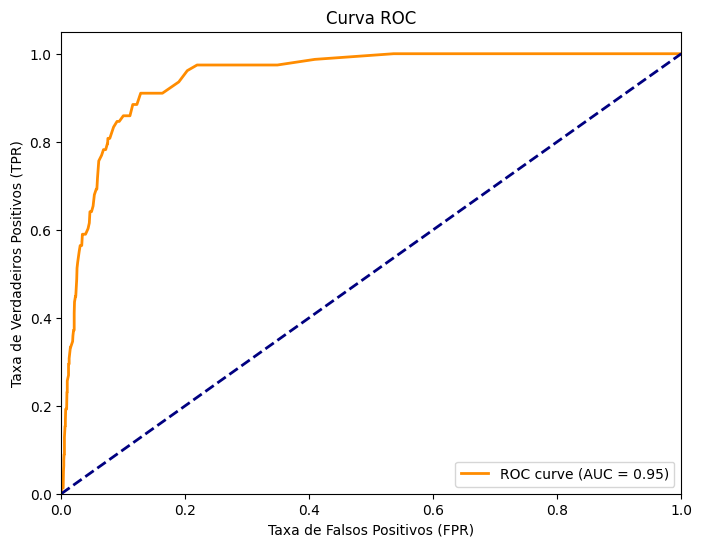

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_class, clf_rf.predict_proba(X_test_class)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Melhoria contínua: Mesmo com uma AUC de 0.94, o modelo ainda pode ser melhorado com ajustes adicionais, como:

Ajuste de thresholds para melhorar o trade-off entre precisão e recall.
Testar outros algoritmos como XGBoost ou LightGBM, que podem oferecer desempenho ainda melhor.
Técnicas de ensemble (como stacking ou bagging) podem ajudar a aumentar a robustez do modelo.
Conclusão
Sua AUC-ROC de 0.94 indica que o modelo está muito bem treinado e consegue discriminar muito bem entre as duas classes. A performance é muito boa, o que significa que o modelo tem um bom potencial para aplicação em dados reais, ajudando na previsão de falência.

Se o objetivo for melhorar ainda mais a precisão para a classe 1 (falir), você pode ajustar o threshold de decisão ou explorar outras técnicas de balanceamento e modelos alternativos. No entanto, do ponto de vista da AUC-ROC, seu modelo já está com uma performance excelente.





# *Modelo Treinado Com Smote*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


# Passo 1: Separar dados para os dois modelos (Classificação e Regressão)

# Modelo de Classificação: prever se vai falir
X_class = merged_df_regressao_previsao[['ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_liquido/ativos',
       'dependencia_emprestimos', 'lucro_operacional/capital_integralizado',
       'estoque_e_contas_receber/valor_liquido', 'giro_contas_receber',
       'dias_medios_recebimento', 'giro_estoques(vezes)',
       'frequencia_giro_ativos_fixos', 'giro_valor_liquido(vezes)',
       'capital_giro/ativos_totais', 'ativos_rapidos/ativos_totais',
       'ativos_correntes/ativos_totais', 'caixa/ativos_totais',
       'ativos_rapidos/passivo_corrente', 'caixa/passivo_corrente',
       'passivo_corrente/ativos', 'fundos_operacionais/passivo',
       'estoque/capital_giro', 'estoque/passivo_corrente',
       'capital_giro/patrimonio_liquido',
       'passivo_longo_prazo/ativos_correntes', 'lucros_retidos/ativos_totais',
       'receita_total/despesa_total', 'despesa_total/ativos',
       'ativos_fixos/ativos', 'fluxo_caixa/ativos_totais',
       'fluxo_caixa/passivo', 'CFO/ativos', 'flag_passivo-ativos',
       'intervalo_sem_credito', 'rendimento_liquido/patrimonio_acionistas',
       'flag_rendimento_liquido']]  # Features
y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de classificação)

# Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
#X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Ajustar SMOTE com diferentes níveis de over-sampling
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Gera 80% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Treinar novamente
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)
y_pred_class_balanced = clf_rf.predict(X_test_class)

# Passo 3: Treinar o modelo

# Modelo de Classificação (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class, y_train_class)

print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))



Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.53      0.47        78

    accuracy                           0.95      2046
   macro avg       0.70      0.75      0.72      2046
weighted avg       0.96      0.95      0.96      2046



# *Teste Com apenas 10 variaveis no treinamento*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Passo 1: Selecionar apenas as 10 variáveis mais importantes
X_class_10 = merged_df_regressao_previsao[[
    'dependencia_emprestimos',
    'rendimento_liquido/patrimonio_acionistas',
    'divida_total/valor_liquido_total',
    'ROA(B) antes juros e depreciação após imposto',
    'receita_despesa_extra_industria',
    'indice_despesas_juros',
    'valor_liquido/ativos',
    'indice_endividamento_%',
    'caixa/ativos_totais',
    'capital_giro/patrimonio_liquido'
]]  # Apenas as 10 variáveis importantes

y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de classificação)

# Passo 2: Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_10, y_class, test_size=0.3, random_state=42
)

# Passo 3: Ajustar SMOTE para balanceamento das classes (caso necessário)
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Gera 30% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Passo 4: Treinar o modelo (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)

# Passo 5: Fazer previsões e avaliar o modelo
y_pred_class_balanced = clf_rf.predict(X_test_class)

# Exibir o relatório de classificação
print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))


Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.43      0.51      0.47        78

    accuracy                           0.96      2046
   macro avg       0.70      0.74      0.72      2046
weighted avg       0.96      0.96      0.96      2046



# *Treino com curva ROC*

Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.43      0.51      0.47        78

    accuracy                           0.96      2046
   macro avg       0.70      0.74      0.72      2046
weighted avg       0.96      0.96      0.96      2046



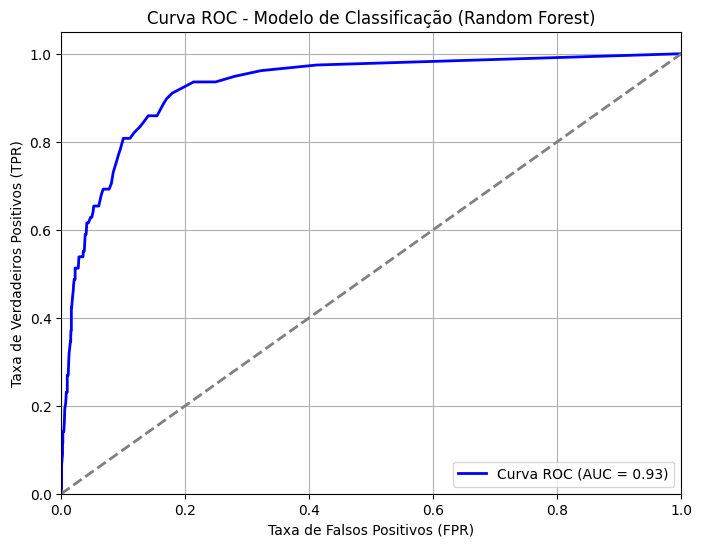

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Passo 1: Selecionar apenas as 10 variáveis mais importantes
X_class_10 = merged_df_regressao_previsao[[
    'dependencia_emprestimos',
    'rendimento_liquido/patrimonio_acionistas',
    'divida_total/valor_liquido_total',
    'ROA(B) antes juros e depreciação após imposto',
    'receita_despesa_extra_industria',
    'indice_despesas_juros',
    'valor_liquido/ativos',
    'indice_endividamento_%',
    'caixa/ativos_totais',
    'capital_giro/patrimonio_liquido'
]]  # Apenas as 10 variáveis importantes

y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de falência)

# Passo 2: Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_10, y_class, test_size=0.3, random_state=42
)

# Passo 3: Ajustar SMOTE para balanceamento das classes (caso necessário)
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Gera 30% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Passo 4: Treinar o modelo (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)

# Passo 5: Fazer previsões e avaliar o modelo
y_pred_class_balanced = clf_rf.predict(X_test_class)

# Exibir o relatório de classificação
print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))

# Passo 6: Gerar a curva ROC

# Probabilidade da classe 1 (falência) para o conjunto de teste
y_pred_proba_class = clf_rf.predict_proba(X_test_class)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba_class)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de aleatoriedade (acaso)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Modelo de Classificação (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# *Treino Com graficos das 10 variaveis*
** modelo escolhido **

Relatório de Classificação após ajuste no SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.55      0.48        78

    accuracy                           0.95      2046
   macro avg       0.70      0.76      0.73      2046
weighted avg       0.96      0.95      0.96      2046



<Figure size 1400x1000 with 0 Axes>

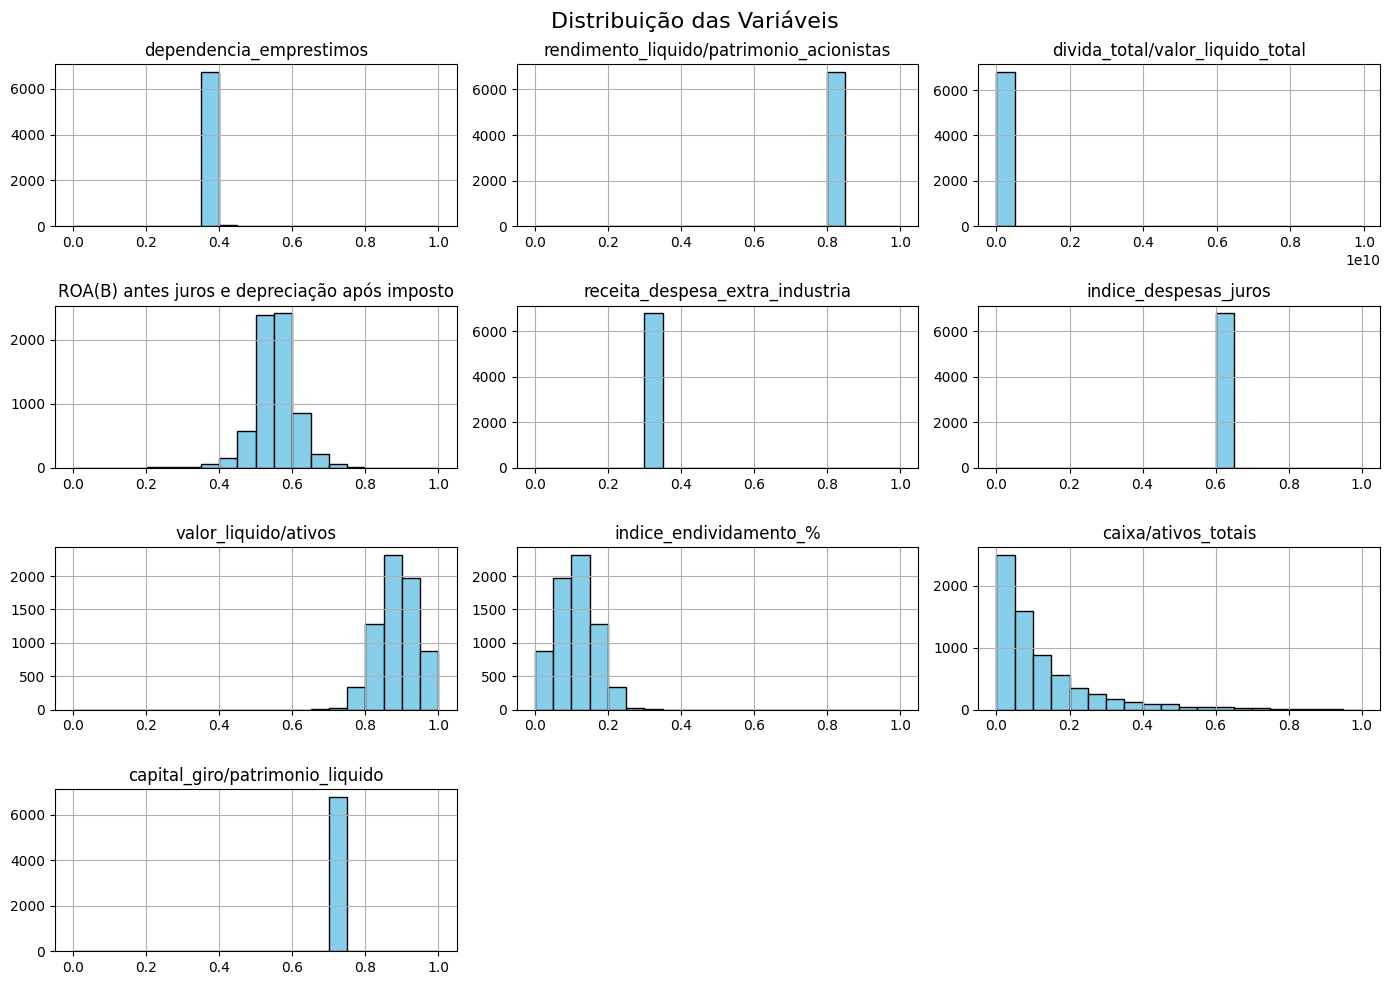

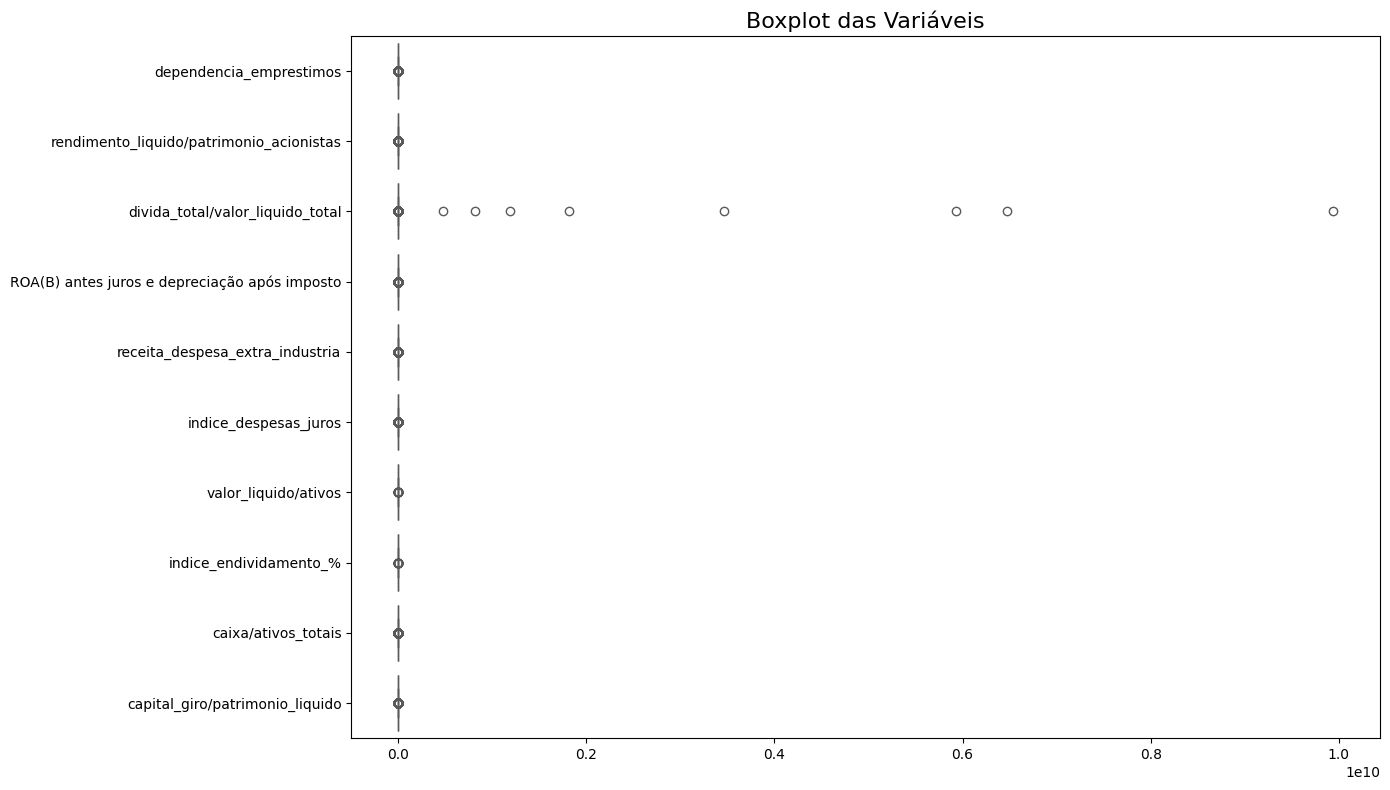

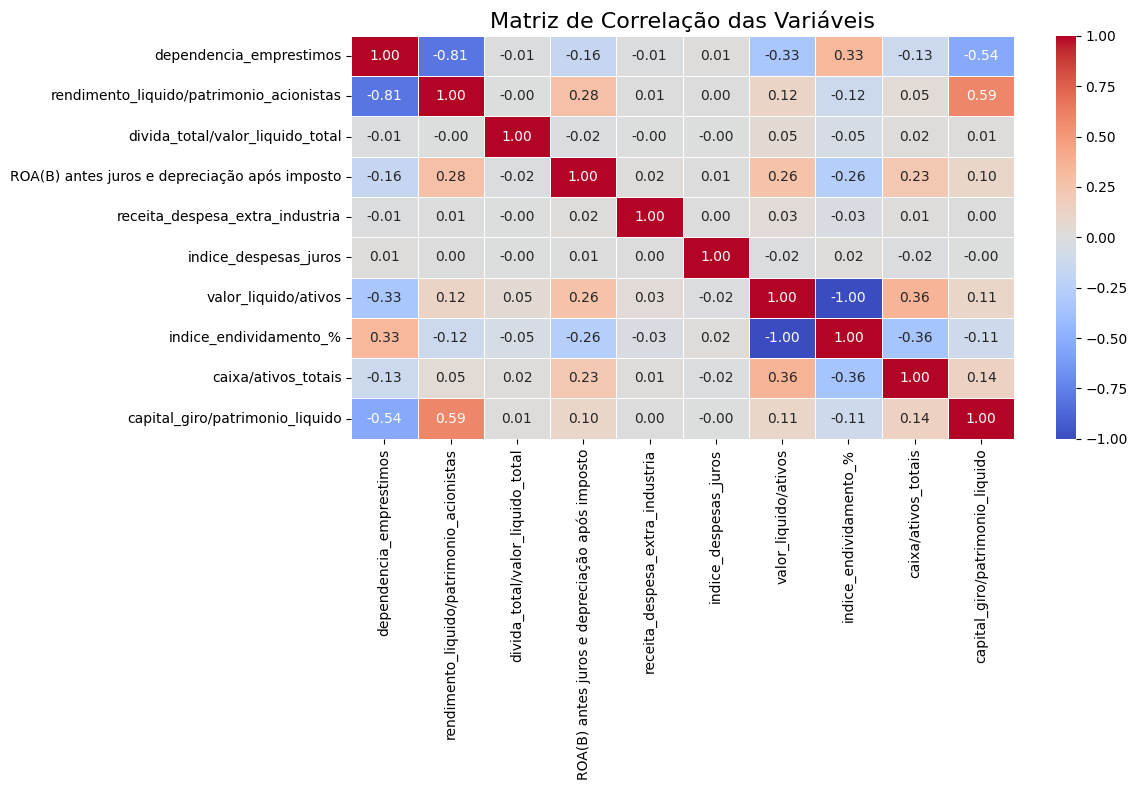

<ipython-input-50-74b64b290313>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-50-74b64b290313>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-50-74b64b290313>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-50-74b64b290313>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

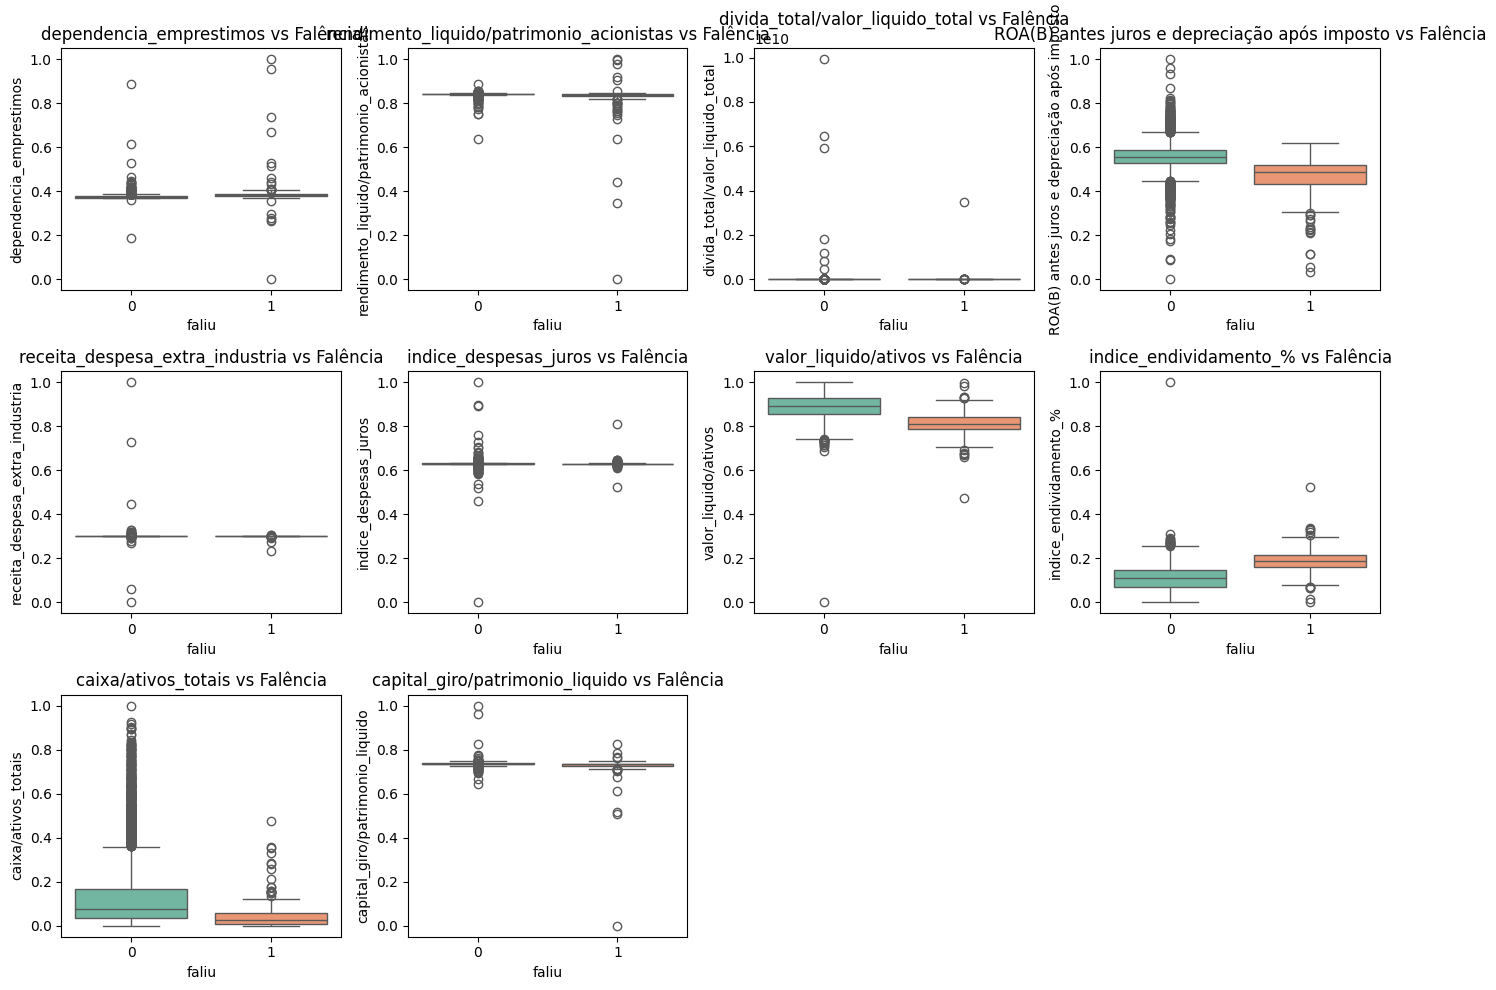

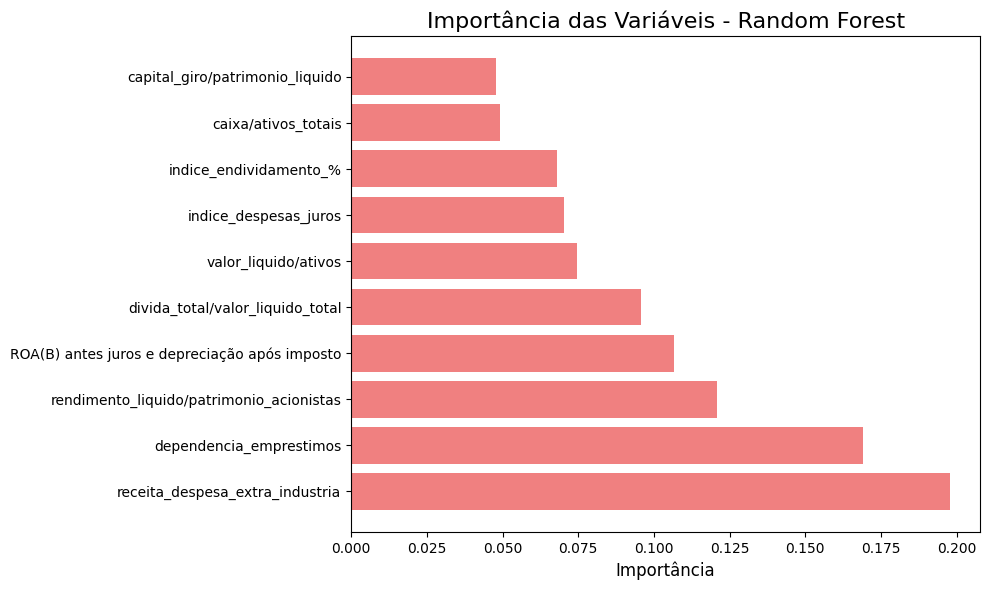

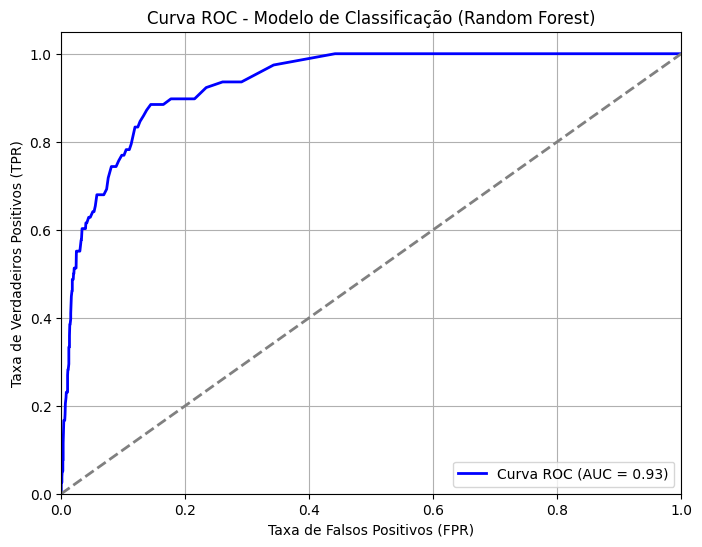

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Passo 1: Selecionar apenas as 10 variáveis mais importantes
X_class_10 = merged_df_regressao_previsao[[
    'dependencia_emprestimos',
    'rendimento_liquido/patrimonio_acionistas',
    'divida_total/valor_liquido_total',
    'ROA(B) antes juros e depreciação após imposto',
    'receita_despesa_extra_industria',
    'indice_despesas_juros',
    'valor_liquido/ativos',
    'indice_endividamento_%',
    'caixa/ativos_totais',
    'capital_giro/patrimonio_liquido'
]]  # Apenas as 10 variáveis importantes

y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de falência)

# Passo 2: Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_10, y_class, test_size=0.3, random_state=42
)

# Passo 3: Ajustar SMOTE para balanceamento das classes (caso necessário)
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # Gera 30% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Passo 4: Treinar o modelo (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)

# Passo 5: Fazer previsões e avaliar o modelo
y_pred_class_balanced = clf_rf.predict(X_test_class)

# Exibir o relatório de classificação
print("Relatório de Classificação após ajuste no SMOTE:")
print(classification_report(y_test_class, y_pred_class_balanced))

# --- Gráficos Essenciais ---

# 1. Histograma para cada variável
plt.figure(figsize=(14, 10))
X_class_10.hist(bins=20, color='skyblue', edgecolor='black', figsize=(14, 10))
plt.suptitle('Distribuição das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplot para identificar outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=X_class_10, orient='h', palette='Set2')
plt.title('Boxplot das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Matriz de Correlação (Heatmap)
corr = X_class_10.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 4. Gráfico de Dispersão - Relacionamento de cada variável com a classe dependente ('faliu')
plt.figure(figsize=(14, 10))
for i, var in enumerate(X_class_10.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
    plt.title(f'{var} vs Falência', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Gráfico de Importância das Variáveis no Random Forest
importances = clf_rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X_class_10.columns[indices], importances[indices], color='lightcoral')
plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Curva ROC
# Probabilidade da classe 1 (falência)
y_pred_proba_class = clf_rf.predict_proba(X_test_class)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba_class)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de aleatoriedade (acaso)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Modelo de Classificação (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Explicação dos Gráficos:

- Histograma:
  - Mostra a distribuição das variáveis para cada uma das 10 variáveis selecionadas. Ele ajuda a ver como os dados estão distribuídos (normalmente, com viés para mais ou para menos, etc.).

- Boxplot:
  - Um boxplot é útil para identificar a presença de outliers e visualizar a dispersão das variáveis. As caixas mostram o intervalo interquartil (IQR), enquanto os bigodes mostram o intervalo de dados sem outliers.
- Matriz de Correlação (Heatmap):

  - Mostra como as variáveis estão correlacionadas entre si. Isso ajuda a identificar colinearidade entre variáveis e potenciais redundâncias no modelo.

- Gráfico de Dispersão (Boxplot para a variável dependente):
  - Aqui, estamos utilizando boxplots para visualizar a distribuição das variáveis para cada classe da variável dependente (faliu). Isso mostra como as variáveis se comportam para as empresas que faliram vs. as que não faliram.

- Gráfico de Importância das Variáveis:
  - Um gráfico de barras horizontais que mostra a importância de cada variável no modelo de Random Forest. As variáveis mais importantes para o modelo são listadas no gráfico, ajudando a visualizar as variáveis que mais impactam a previsão de falência.

- Curva ROC:
  - A curva ROC e a AUC (Área sob a Curva) são usadas para avaliar o desempenho do modelo, mostrando a relação entre a taxa de falsos positivos (FPR) e a taxa de verdadeiros positivos (TPR). Quanto maior a AUC, melhor o modelo.

# *Treino - Teste Com hiperparametros*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Passo 1: Separar dados para o modelo de classificação (prever falência)
X_class = merged_df_regressao_previsao[[
                                        'dependencia_emprestimos',
                                        'rendimento_liquido/patrimonio_acionistas',
                                        'divida_total/valor_liquido_total',
                                        'ROA(B) antes juros e depreciação após imposto',
                                        'receita_despesa_extra_industria',
                                        'indice_despesas_juros',
                                        'valor_liquido/ativos',
                                        'indice_endividamento_%',
                                        'caixa/ativos_totais',
                                        'capital_giro/patrimonio_liquido']]  # Features

y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de falência)

# Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Passo 2: Ajuste do SMOTE (oversampling)
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # Gera 80% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Passo 3: Ajuste dos hiperparâmetros utilizando GridSearchCV

# Definindo a grade de parâmetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [10, 20, 30, None],  # Profundidade das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras em uma folha
    'class_weight': ['balanced', None]  # Ajuste de pesos para as classes
}

# Realizando o GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_class_balanced, y_train_class_balanced)

# Pegando o melhor modelo encontrado
clf_rf_best = grid_search.best_estimator_

# Passo 4: Treinar o modelo com os melhores parâmetros e pesos ajustados
clf_rf_best.fit(X_train_class_balanced, y_train_class_balanced)

# Passo 5: Previsões com o modelo ajustado
y_pred_class_balanced = clf_rf_best.predict(X_test_class)

# Passo 6: Ajustar o threshold (probabilidade de decisão)

# Probabilidade da classe 1
y_pred_proba_class = clf_rf_best.predict_proba(X_test_class)[:, 1]

# Ajustando o threshold para 0.3 (um valor mais baixo, favorecendo a classe minoritária)
y_pred_class_adjusted = (y_pred_proba_class >= 0.3).astype(int)

# Passo 7: Avaliar o modelo com o threshold ajustado
print("Relatório de Classificação com Threshold Ajustado e Hiperparâmetros:")
print(classification_report(y_test_class, y_pred_class_adjusted))


Relatório de Classificação com Threshold Ajustado e Hiperparâmetros:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1968
           1       0.30      0.67      0.41        78

    accuracy                           0.93      2046
   macro avg       0.64      0.80      0.69      2046
weighted avg       0.96      0.93      0.94      2046



# *Testando com KNN*


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Passo 1: Separar dados para os dois modelos (Classificação e Regressão)

# Modelo de Classificação: prever se vai falir
X_class = merged_df_regressao_previsao[['ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_liquido/ativos',
       'dependencia_emprestimos', 'lucro_operacional/capital_integralizado',
       'estoque_e_contas_receber/valor_liquido', 'giro_contas_receber',
       'dias_medios_recebimento', 'giro_estoques(vezes)',
       'frequencia_giro_ativos_fixos', 'giro_valor_liquido(vezes)',
       'capital_giro/ativos_totais', 'ativos_rapidos/ativos_totais',
       'ativos_correntes/ativos_totais', 'caixa/ativos_totais',
       'ativos_rapidos/passivo_corrente', 'caixa/passivo_corrente',
       'passivo_corrente/ativos', 'fundos_operacionais/passivo',
       'estoque/capital_giro', 'estoque/passivo_corrente',
       'capital_giro/patrimonio_liquido',
       'passivo_longo_prazo/ativos_correntes', 'lucros_retidos/ativos_totais',
       'receita_total/despesa_total', 'despesa_total/ativos',
       'ativos_fixos/ativos', 'fluxo_caixa/ativos_totais',
       'fluxo_caixa/passivo', 'CFO/ativos', 'flag_passivo-ativos',
       'intervalo_sem_credito', 'rendimento_liquido/patrimonio_acionistas',
       'flag_rendimento_liquido']]  # Features
y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de classificação)

# Modelo de Regressão: prever gastos futuros
#X_reg = df_final[['gastos_mensais', 'receitas_mensais', 'divida', 'patrimonio']]  # Features (mesmas ou diferentes)
#y_reg = df_final['gastos_futuros']  # Variável dependente (contínua, para regressão)

# Dividir os dados em treino e teste para ambos os modelos
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
#X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Passo 3: Treinar os dois modelos

# Modelo de Classificação (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=5)  # Aqui usamos o KNN para classificação
clf_knn.fit(X_train_class, y_train_class)

# Modelo de Regressão (KNN)
#reg_knn = KNeighborsRegressor(n_neighbors=5)  # KNN para regressão
#reg_knn.fit(X_train_reg, y_train_reg)

# Passo 4: Fazer previsões com ambos os modelos
# Previsões com o modelo de Classificação
y_pred_class = clf_knn.predict(X_test_class)

# Previsões com o modelo de Regressão
#y_pred_reg = reg_knn.predict(X_test_reg)

# Passo 5: Avaliar ambos os modelos

# Avaliação do modelo de Classificação
print("Acurácia do modelo de classificação (KNN):", accuracy_score(y_test_class, y_pred_class))
print("Relatório de Classificação (KNN):\n", classification_report(y_test_class, y_pred_class))

# Avaliação do modelo de Regressão
#mse = mean_squared_error(y_test_reg, y_pred_reg)
#r2 = r2_score(y_test_reg, y_pred_reg)

#print(f'Erro Quadrático Médio (MSE) do modelo de regressão (KNN): {mse}')
#print(f'Coeficiente de Determinação (R²) do modelo de regressão (KNN): {r2}')


Acurácia do modelo de classificação (KNN): 0.9613880742913001
Relatório de Classificação (KNN):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



# *Testando Modelo com Naive Bayes*


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Passo 1: Separar dados para os dois modelos (Classificação)

# Modelo de Classificação: prever se vai falir
X_class = merged_df_regressao_previsao[['ROA(C) antes juros e depreciação antes de juros',
       'ROA(A) antes juros e % após imposto',
       'ROA(B) antes juros e depreciação após imposto',
       'margem_bruta_operacional', 'margem_bruta_vendas_realizadas',
       'taxa_lucro_operacional', 'taxa_juros_líquida_antes_imposto',
       'taxa_juros_líquida_após_imposto', 'receita_despesa_extra_industria',
       'taxa_juros_contínua_após_imposto', 'taxa_despesas_operacionais',
       'taxa_despesas_pesquisa_desenvolvimento', 'taxa_fluxo_caixa',
       'taxa_juros_divida_com_juros', 'taxa_imposto(A)',
       'taxa_crescimento_lucro_bruto_vendas_realizadas',
       'taxa_crescimento_lucro_operacional',
       'taxa_crescimento_lucro_liquido_apos_imposto',
       'taxa_crescimento_total_ativos', 'reinversao_caixa_%',
       'indice_liquidez_corrente', 'indice_liquidez_seca',
       'indice_despesas_juros', 'divida_total/valor_liquido_total',
       'indice_endividamento_%', 'valor_liquido/ativos',
       'dependencia_emprestimos', 'lucro_operacional/capital_integralizado',
       'estoque_e_contas_receber/valor_liquido', 'giro_contas_receber',
       'dias_medios_recebimento', 'giro_estoques(vezes)',
       'frequencia_giro_ativos_fixos', 'giro_valor_liquido(vezes)',
       'capital_giro/ativos_totais', 'ativos_rapidos/ativos_totais',
       'ativos_correntes/ativos_totais', 'caixa/ativos_totais',
       'ativos_rapidos/passivo_corrente', 'caixa/passivo_corrente',
       'passivo_corrente/ativos', 'fundos_operacionais/passivo',
       'estoque/capital_giro', 'estoque/passivo_corrente',
       'capital_giro/patrimonio_liquido',
       'passivo_longo_prazo/ativos_correntes', 'lucros_retidos/ativos_totais',
       'receita_total/despesa_total', 'despesa_total/ativos',
       'ativos_fixos/ativos', 'fluxo_caixa/ativos_totais',
       'fluxo_caixa/passivo', 'CFO/ativos', 'flag_passivo-ativos',
       'intervalo_sem_credito', 'rendimento_liquido/patrimonio_acionistas',
       'flag_rendimento_liquido']]  # Features
y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de classificação)

# Dividir os dados em treino e teste para o modelo de classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Passo 3: Treinar o modelo de Classificação com Naive Bayes (Gaussian Naive Bayes)

clf_nb = GaussianNB()  # Modelo Naive Bayes para Classificação
clf_nb.fit(X_train_class, y_train_class)

# Passo 4: Fazer previsões com o modelo de Classificação
y_pred_class = clf_nb.predict(X_test_class)

# Passo 5: Avaliar o modelo de Classificação

print("Acurácia do modelo de classificação (Naive Bayes):", accuracy_score(y_test_class, y_pred_class))
print("Relatório de Classificação (Naive Bayes):\n", classification_report(y_test_class, y_pred_class))


Acurácia do modelo de classificação (Naive Bayes): 0.07966764418377321
Relatório de Classificação (Naive Bayes):
               precision    recall  f1-score   support

           0       0.98      0.04      0.08      1968
           1       0.04      0.97      0.07        78

    accuracy                           0.08      2046
   macro avg       0.51      0.51      0.08      2046
weighted avg       0.94      0.08      0.08      2046



# *Teste com random forest com SMOTE, PESOS, THRESOLD E AJUSTE DE HIPERPARÂMETROS*

# *Modelo Escolhido*

Threshold: 0.1
Threshold: 0.2
Threshold: 0.3
Threshold: 0.4
Threshold: 0.5
Baseline Accuracy: 0.9702
Relatório de Classificação após ajuste no SMOTE e threshold:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.55      0.48        78

    accuracy                           0.95      2046
   macro avg       0.70      0.76      0.73      2046
weighted avg       0.96      0.95      0.96      2046



<Figure size 1400x1000 with 0 Axes>

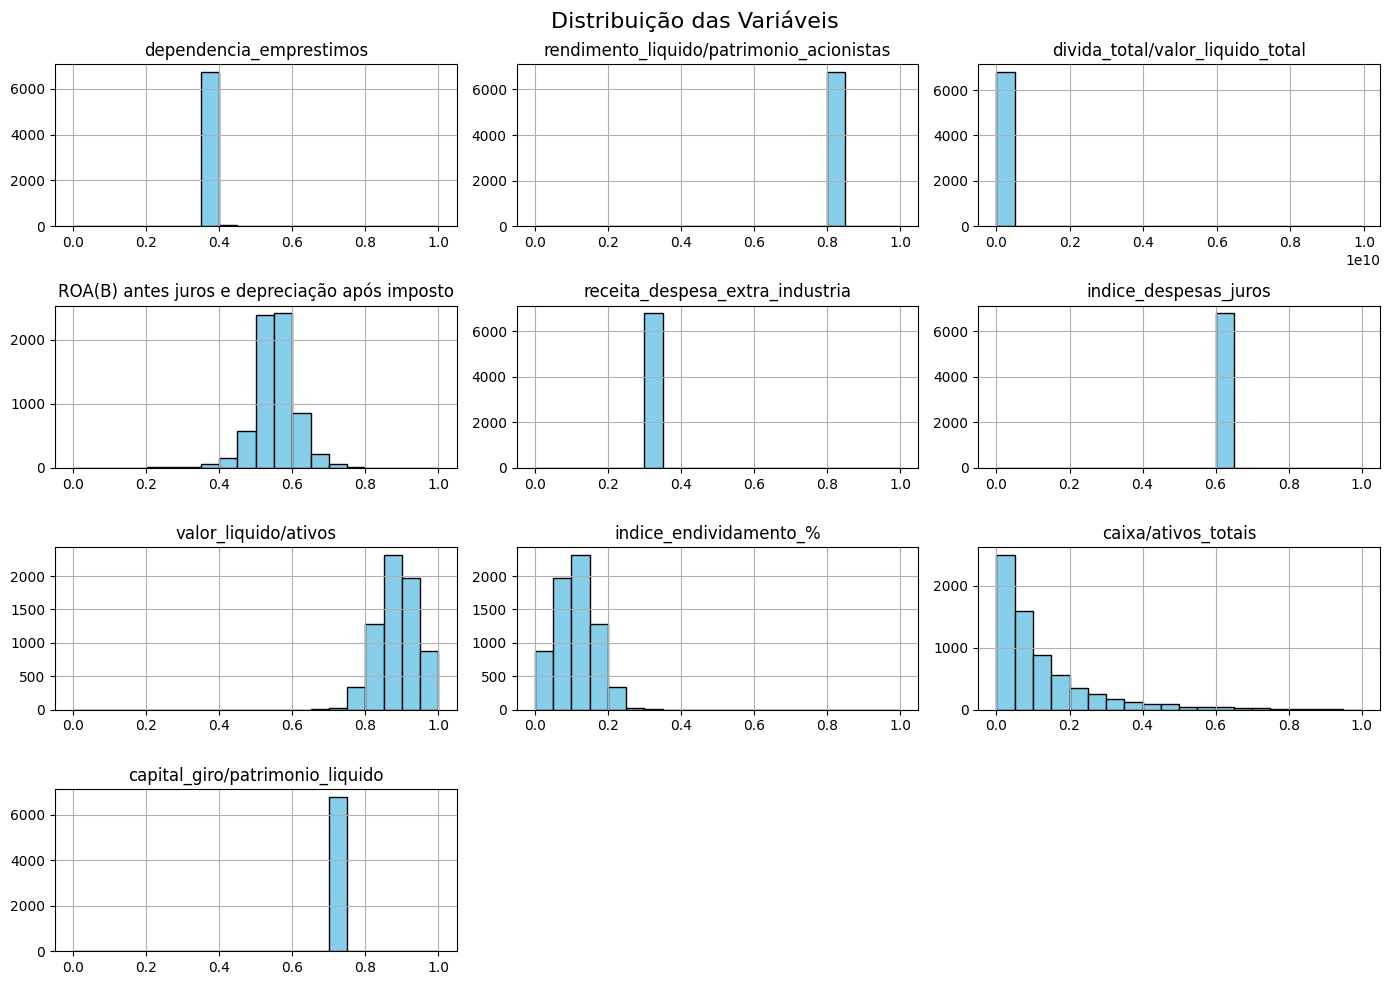

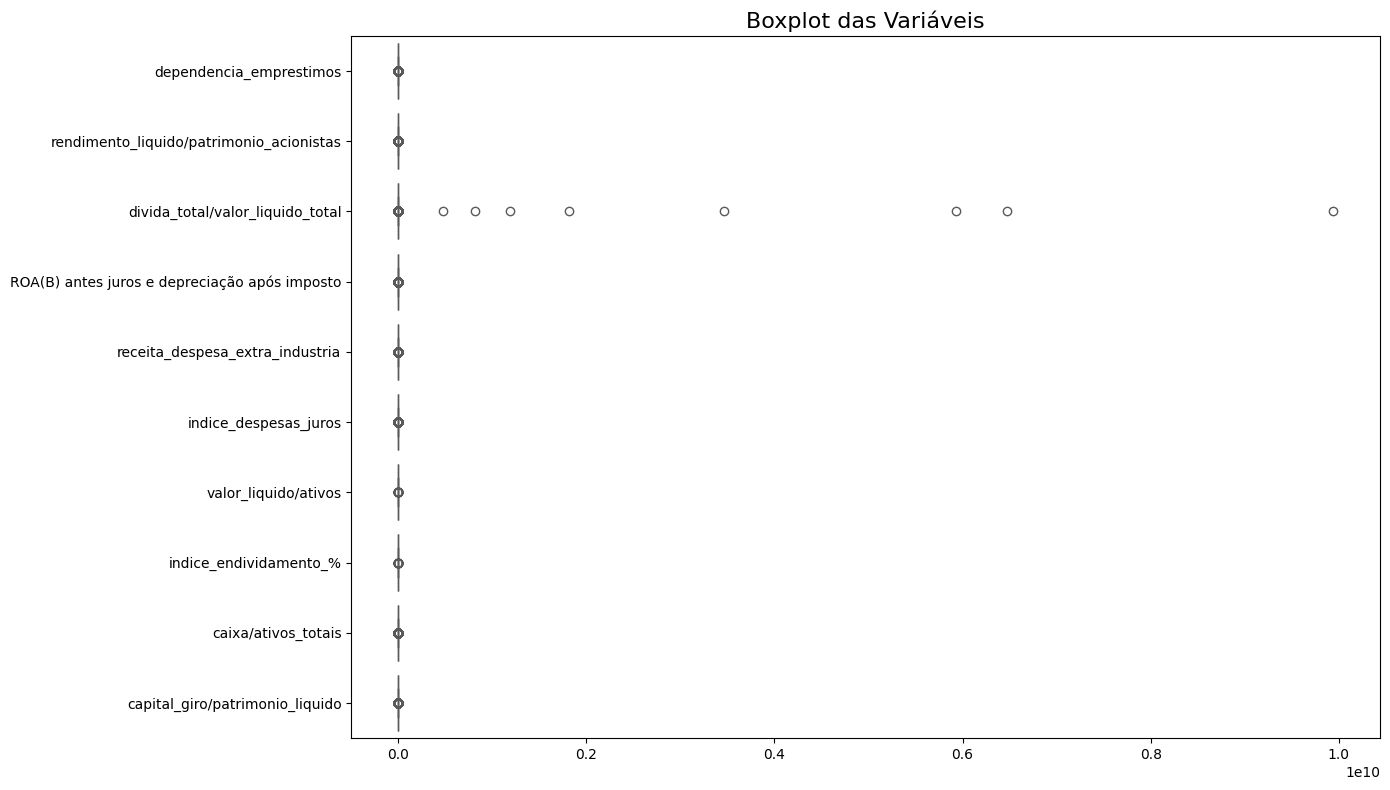

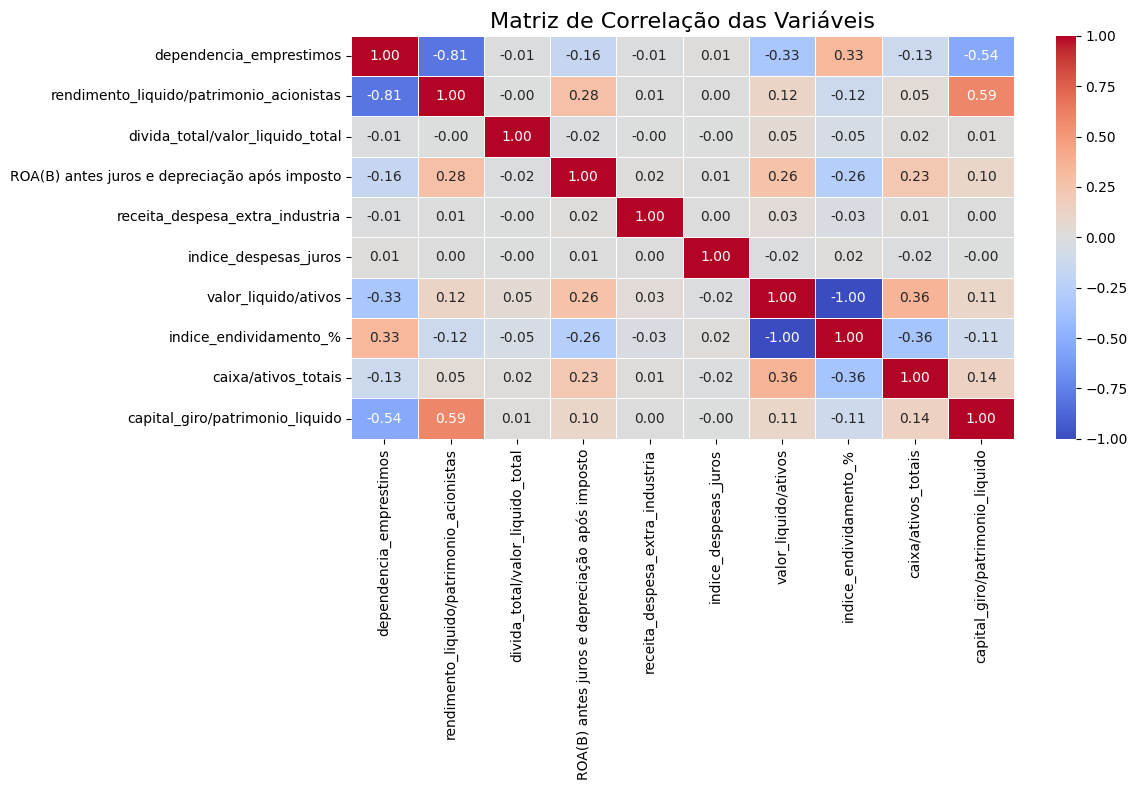

<ipython-input-54-cd6d737b7bdc>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-54-cd6d737b7bdc>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-54-cd6d737b7bdc>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
<ipython-input-54-cd6d737b7bdc>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

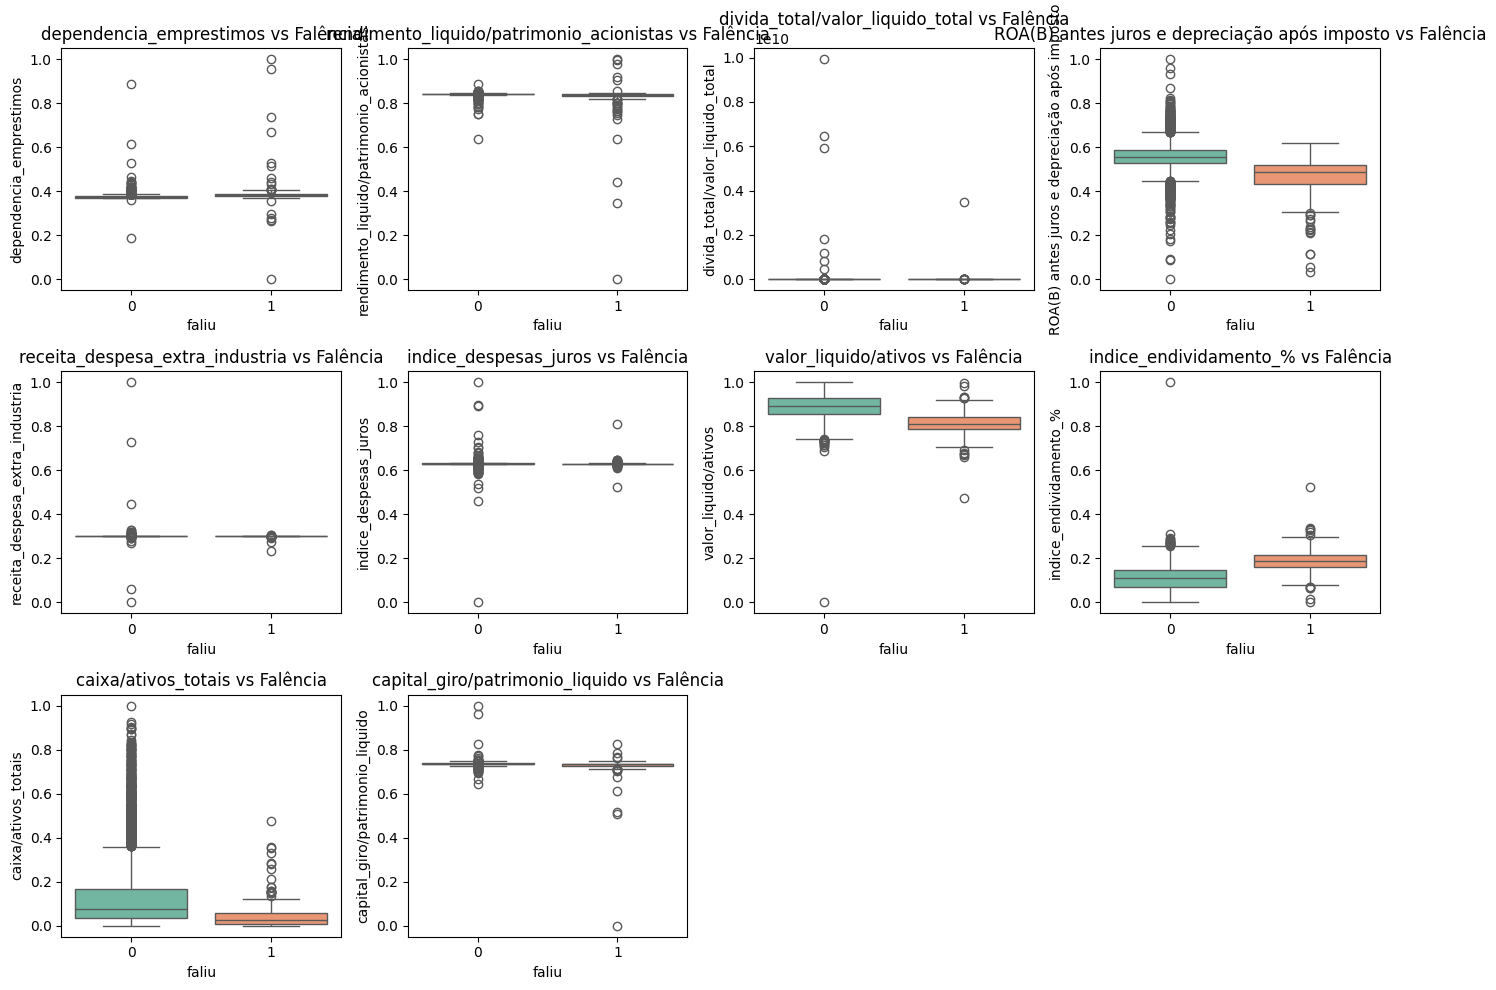

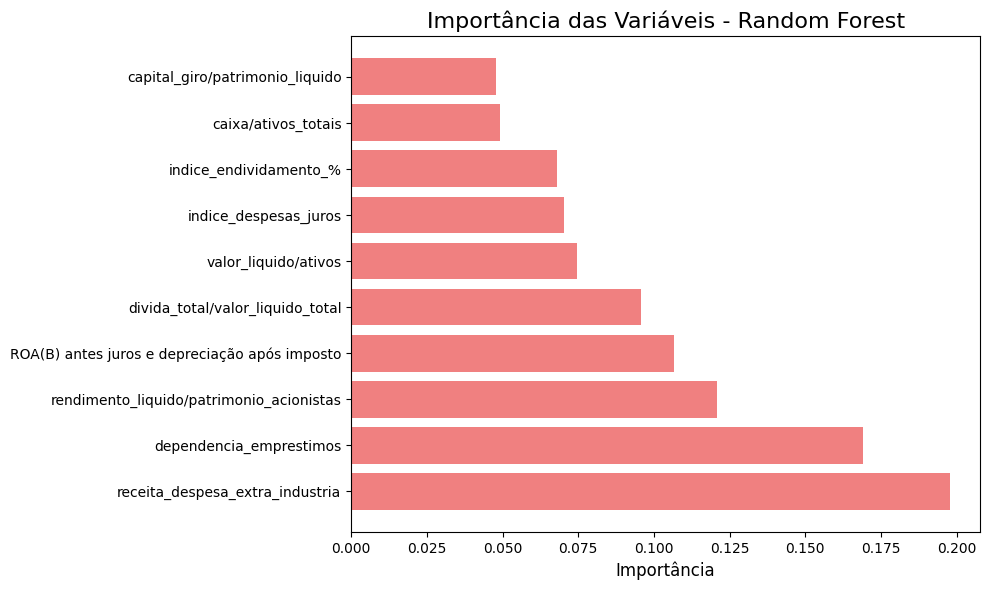

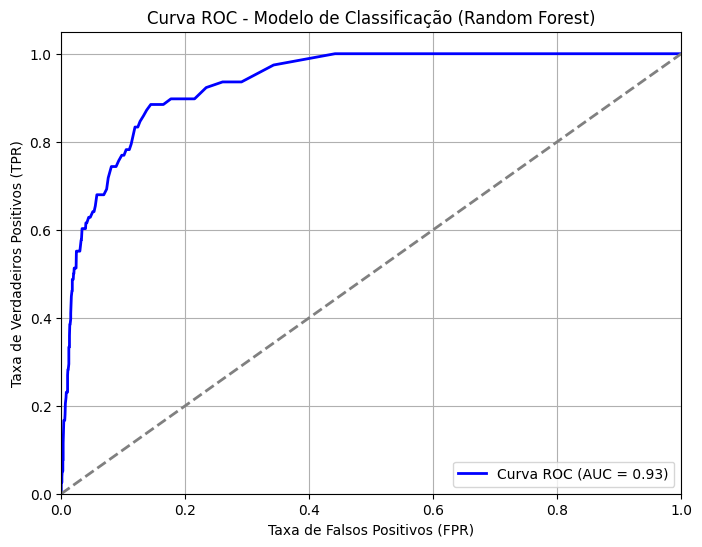

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Passo 1: Selecionar apenas as 10 variáveis mais importantes
X_class_10 = merged_df_regressao_previsao[[  # Ajuste conforme seu DataFrame
    'dependencia_emprestimos',
    'rendimento_liquido/patrimonio_acionistas',
    'divida_total/valor_liquido_total',
    'ROA(B) antes juros e depreciação após imposto',
    'receita_despesa_extra_industria',
    'indice_despesas_juros',
    'valor_liquido/ativos',
    'indice_endividamento_%',
    'caixa/ativos_totais',
    'capital_giro/patrimonio_liquido'
]]  # Apenas as 10 variáveis importantes

y_class = merged_df_regressao_previsao['faliu']  # Variável dependente (classe de falência)

# Passo 2: Dividir os dados em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_10, y_class, test_size=0.3, random_state=42
)

# Passo 3: Ajustar SMOTE para balanceamento das classes (caso necessário)
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # Gera 40% do número de instâncias da classe 0
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Passo 4: Treinar o modelo (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_class_balanced, y_train_class_balanced)

# Passo 5: Fazer previsões de probabilidade e aplicar o threshold
y_pred_proba_class = clf_rf.predict_proba(X_test_class)[:, 1]  # Probabilidades para a classe 1 (falência)

# Ajustando o threshold
# Teste de diferentes limiares de decisão (thresholds)
thresholds_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds_test:
    y_pred_class_adjusted = (y_pred_proba_class > threshold).astype(int)
    print(f"Threshold: {threshold}")

# Acurácia do Baseline: Proporção da classe majoritária no conjunto de treino
acc_baseline = y_train_class.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

# Exibir o relatório de classificação
print("Relatório de Classificação após ajuste no SMOTE e threshold:")
print(classification_report(y_test_class, y_pred_class_adjusted))

# --- Gráficos Essenciais ---

# 1. Histograma para cada variável
plt.figure(figsize=(14, 10))
X_class_10.hist(bins=20, color='skyblue', edgecolor='black', figsize=(14, 10))
plt.suptitle('Distribuição das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplot para identificar outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=X_class_10, orient='h', palette='Set2')
plt.title('Boxplot das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Matriz de Correlação (Heatmap)
corr = X_class_10.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# 4. Gráfico de Dispersão - Relacionamento de cada variável com a classe dependente ('faliu')
plt.figure(figsize=(14, 10))
for i, var in enumerate(X_class_10.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=y_class, y=X_class_10[var], palette='Set2')
    plt.title(f'{var} vs Falência', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Gráfico de Importância das Variáveis no Random Forest
importances = clf_rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X_class_10.columns[indices], importances[indices], color='lightcoral')
plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Curva ROC
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba_class)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de aleatoriedade (acaso)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Modelo de Classificação (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



# *Salvando modelo escolhido*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Caminho onde o modelo será salvo no Google Drive
model_path = '/content/drive/My Drive/random_forest_model2.2.pkl'

# Salvar o modelo
joblib.dump(clf_rf, model_path)

print(f'Modelo salvo em: {model_path}')


Modelo salvo em: /content/drive/My Drive/random_forest_model2.2.pkl


Baixar o Modelo do Google Drive para o seu Computador Local (se necessário)
Vá até o seu Google Drive e localize o arquivo random_forest_model.pkl na pasta "My Drive".
Baixe o arquivo para o seu computador local.
4. Carregar o Modelo em Outro Ambiente Python
Se você precisar usar esse modelo em um outro ambiente Python (fora do Colab), basta usar o código abaixo para carregá-lo:

a. Carregar o Modelo em Python Local:
python
Copiar código
import joblib

# Caminho do modelo (ajuste para o local onde o arquivo foi baixado ou movido)
model_path = 'random_forest_model.pkl'

# Carregar o modelo salvo
loaded_model = joblib.load(model_path)

# Agora você pode usar o modelo carregado para fazer previsões
y_pred = loaded_model.predict(X_test_class)  # Supondo que X_test_class seja um conjunto de dados válido
print(y_pred)



# *Simulando funcionamento*

In [ ]:
# Importar bibliotecas
import joblib
import pandas as pd
import numpy as np

# Carregar o modelo treinado
modelo = joblib.load('/content/drive/My Drive/random_forest_model2.2.pkl')  # Substitua com o caminho do seu modelo

# Verificar se o modelo foi carregado corretamente
print(modelo)


RandomForestClassifier(random_state=42)


# *Simular Dados Fictícios*
- Agora, vamos criar um conjunto de dados fictícios (exemplo) para testar o modelo. Estes dados serão passados para o modelo de previsão como um DataFrame.

In [ ]:
import pandas as pd

# Dados fictícios para teste
dados_ficticios_novos = {
    'dependencia_emprestimos': [0.4],  # Dependência de empréstimos (exemplo: 40%)
    'rendimento_liquido/patrimonio_acionistas': [0.15],  # Rendimento líquido sobre patrimônio dos acionistas (exemplo: 15%)
    'divida_total/valor_liquido_total': [0.5],  # Dívida total sobre valor líquido total (exemplo: 50%)
    'ROA(B) antes juros e depreciação após imposto': [0.12],  # ROA (Return on Assets) antes de juros e depreciação (exemplo: 12%)
    'receita_despesa_extra_industria': [2000],  # Receita de despesa extra indústria (exemplo: 2000)
    'indice_despesas_juros': [0.08],  # Índice de despesas com juros (exemplo: 8%)
    'valor_liquido/ativos': [0.6],  # Valor líquido sobre ativos (exemplo: 60%)
    'indice_endividamento_%': [0.4],  # Índice de endividamento (exemplo: 40%)
    'caixa/ativos_totais': [0.1],  # Caixa sobre ativos totais (exemplo: 10%)
    'capital_giro/patrimonio_liquido': [0.3]  # Capital de giro sobre patrimônio líquido (exemplo: 30%)
}

# Converter os dados para um DataFrame do pandas
df_ficticio_novo = pd.DataFrame(dados_ficticios_novos)

# Exibir os dados para verificação
df_ficticio_novo


,dependencia_emprestimos,rendimento_liquido/patrimonio_acionistas,divida_total/valor_liquido_total,ROA(B) antes juros e depreciação após imposto,receita_despesa_extra_industria,indice_despesas_juros,valor_liquido/ativos,indice_endividamento_%,caixa/ativos_totais,capital_giro/patrimonio_liquido
0,0.4,0.15,0.5,0.12,2000,0.08,0.6,0.4,0.1,0.3


# *Fazer a Previsão com o Modelo*
# 1º Teste
- Agora, vamos usar o modelo treinado para fazer a previsão sobre os dados fictícios.

In [ ]:
# Realizar a previsão
previsao = modelo.predict(df_ficticio_novo)

# Verificar o resultado da previsão
if previsao[0] == 0:
    resultado = "Não vai falir"
else:
    resultado = "Vai falir"

print(f"A previsão de falência é: {resultado}")


A previsão de falência é: Não vai falir


# *2º teste*

In [ ]:
import pandas as pd

# Dados fictícios para teste
dados_ficticios_novos = {
    'dependencia_emprestimos': [0.6],  # Dependência de empréstimos (exemplo: 60%)
    'rendimento_liquido/patrimonio_acionistas': [0.20],  # Rendimento líquido sobre patrimônio dos acionistas (exemplo: 20%)
    'divida_total/valor_liquido_total': [0.6],  # Dívida total sobre valor líquido total (exemplo: 60%)
    'ROA(B) antes juros e depreciação após imposto': [0.10],  # ROA (Return on Assets) antes de juros e depreciação (exemplo: 10%)
    'receita_despesa_extra_industria': [3500],  # Receita de despesa extra indústria (exemplo: 2000)
    'indice_despesas_juros': [0.15],  # Índice de despesas com juros (exemplo: 15%)
    'valor_liquido/ativos': [0.6],  # Valor líquido sobre ativos (exemplo: 60%)
    'indice_endividamento_%': [0.6],  # Índice de endividamento (exemplo: 60%)
    'caixa/ativos_totais': [0.2],  # Caixa sobre ativos totais (exemplo: 20%)
    'capital_giro/patrimonio_liquido': [0.3]  # Capital de giro sobre patrimônio líquido (exemplo: 30%)
}

# Converter os dados para um DataFrame do pandas
df_ficticio_novo2 = pd.DataFrame(dados_ficticios_novos)

# Exibir os dados para verificação
df_ficticio_novo2

,dependencia_emprestimos,rendimento_liquido/patrimonio_acionistas,divida_total/valor_liquido_total,ROA(B) antes juros e depreciação após imposto,receita_despesa_extra_industria,indice_despesas_juros,valor_liquido/ativos,indice_endividamento_%,caixa/ativos_totais,capital_giro/patrimonio_liquido
0,0.6,0.2,0.6,0.1,3500,0.15,0.6,0.6,0.2,0.3


In [ ]:
# Realizar a previsão
previsao = modelo.predict(df_ficticio_novo2)

# Verificar o resultado da previsão
if previsao[0] == 0:
    resultado = "Não vai falir"
else:
    resultado = "Vai falir"

print(f"A previsão de falência é: {resultado}")

A previsão de falência é: Não vai falir


# *3º Teste*

In [ ]:
import pandas as pd

# Dados fictícios para teste, com características indicativas de falência
dados_ficticios_falencia = {
    'dependencia_emprestimos': [0.90],  # Alta dependência de empréstimos (90%)
    'rendimento_liquido/patrimonio_acionistas': [0.05],  # Baixo rendimento sobre patrimônio (5%)
    'divida_total/valor_liquido_total': [2.2],  # Dívida total maior que o valor líquido (120%)
    'ROA(B) antes juros e depreciação após imposto': [0.03],  # Baixo retorno sobre os ativos (3%)
    'receita_despesa_extra_industria': [15000],  # Alta despesa extra com a indústria (5.000)
    'indice_despesas_juros': [0.65],  # Alto índice de despesas com juros (25%)
    'valor_liquido/ativos': [0.35],  # Baixo valor líquido sobre os ativos (35%)
    'indice_endividamento_%': [0.75],  # Alta porcentagem de endividamento (75%)
    'caixa/ativos_totais': [0.05],  # Baixa proporção de caixa sobre ativos totais (5%)
    'capital_giro/patrimonio_liquido': [0.1]  # Baixo capital de giro sobre patrimônio líquido (10%)
}

# Converter os dados para um DataFrame do pandas
df_ficticio_falencia = pd.DataFrame(dados_ficticios_falencia)

# Exibir os dados para verificação
df_ficticio_falencia


,dependencia_emprestimos,rendimento_liquido/patrimonio_acionistas,divida_total/valor_liquido_total,ROA(B) antes juros e depreciação após imposto,receita_despesa_extra_industria,indice_despesas_juros,valor_liquido/ativos,indice_endividamento_%,caixa/ativos_totais,capital_giro/patrimonio_liquido
0,0.9,0.05,2.2,0.03,15000,0.65,0.35,0.75,0.05,0.1


In [ ]:
# Realizar a previsão
previsao = modelo.predict(df_ficticio_falencia)

# Verificar o resultado da previsão
if previsao[0] == 0:
    resultado = "Não vai falir"
else:
    resultado = "Vai falir"

print(f"A previsão de falência é: {resultado}")

A previsão de falência é: Vai falir


# Como utilizar e colunas para o formulario

# 1. Dependência de Empréstimos
- Pergunta no Formulário:
  - "Qual a porcentagem das suas dívidas totais que é financiada por empréstimos?"

- Como obter esse valor:
  - "Para calcular esse valor, basta dividir o total de empréstimos que sua empresa tem (seja com bancos, financeiras ou outras fontes) pelo total das dívidas totais da empresa. Se você tem um extrato de dívidas ou um relatório de financiamentos, esse número estará lá. Depois, multiplique por 100 para ter o valor em porcentagem."

## Explicação para o usuário:
- "Este valor mostra o quanto sua empresa depende de empréstimos para manter suas operações. Se for muito alto, isso pode ser um sinal de que sua empresa pode estar com dificuldades financeiras."

# 2. Rentabilidade sobre o Patrimônio dos Sócios
- Pergunta no Formulário:
  - "Quanto a sua empresa lucra em relação ao valor investido pelos sócios?"

## Como obter esse valor:
- "Primeiro, calcule o lucro líquido da sua empresa (o que sobra após todos os custos e impostos). Em seguida, divida esse lucro pelo valor total que os sócios investiram na empresa (o patrimônio deles). Multiplique o resultado por 100 para ter o valor em porcentagem."

## Explicação para o usuário:
- "Este indicador mostra se a empresa está gerando lucro em relação ao dinheiro que os sócios colocaram nela. Se esse valor for muito baixo, pode ser que sua empresa não esteja sendo eficiente em gerar retorno."

# 3. Dívida Total vs. Valor Líquido da Empresa
- Pergunta no Formulário:
  - "Qual o valor total das suas dívidas em relação ao valor que sua empresa possui de ativos líquidos?"

## Como obter esse valor:
- "Para calcular isso, some todas as dívidas da empresa, incluindo empréstimos, financiamentos e qualquer outra obrigação financeira. Em seguida, verifique o valor de seus ativos líquidos (dinheiro e bens que podem ser rapidamente convertidos em dinheiro). Divida o total de dívidas pelo valor dos ativos líquidos e multiplique por 100 para obter a porcentagem."

## Explicação para o usuário:
- "Esse valor mostra se a empresa tem mais dívidas do que o que possui em dinheiro e bens líquidos. Se a dívida for maior, isso pode indicar que a empresa está em risco de não conseguir pagar suas obrigações."

# 4. Retorno sobre os Ativos
- Pergunta no Formulário:
  - "Quanto sua empresa lucra em relação aos seus bens e propriedades?"

## Como obter esse valor:
- "Primeiro, calcule o lucro líquido da sua empresa (como já foi explicado). Em seguida, some o valor de todos os ativos da empresa (bens, imóveis, equipamentos, etc.). Divida o lucro líquido pelo total de ativos e multiplique por 100 para obter a porcentagem."

## Explicação para o usuário:
- "Esse número mostra o quanto sua empresa consegue gerar de lucro com os bens e propriedades que possui. Se o retorno for baixo, pode ser que a empresa não esteja aproveitando bem seus recursos."



# 5. Despesas Extraordinárias com a Indústria
- Pergunta no Formulário:
  - "Sua empresa tem gastos extras com a indústria? Se sim, qual o valor desses gastos?"

- Como obter esse valor:
  - "Esses gastos podem ser encontrados em seus relatórios financeiros, especificamente na parte que fala sobre despesas operacionais ou custos extraordinários. Se sua empresa teve custos não recorrentes (como manutenção de equipamentos ou aquisição de matérias-primas a um custo inesperado), some esses valores."

- Explicação para o usuário:
  - "Esses gastos representam custos adicionais que sua empresa tem fora do normal. Se eles forem muito altos, podem afetar sua rentabilidade e saúde financeira."

# 6. Índice de Despesas com Juros
- Pergunta no Formulário:
  - "Qual é a porcentagem da sua receita que é usada para pagar juros de dívidas?"

## Como obter esse valor:
- "Para calcular, verifique os pagamentos de juros feitos pela sua empresa (geralmente na seção de ‘despesas financeiras’ do seu balanço). Depois, divida o total de juros pagos pela sua receita anual. Multiplique o resultado por 100 para obter a porcentagem."

- Explicação para o usuário:
  - "Se um grande valor da sua receita é destinado ao pagamento de juros, isso pode indicar que sua empresa está gastando mais para manter suas dívidas do que para crescer."



# 7. Valor Líquido vs. Ativos Totais
- Pergunta no Formulário:
  - "Qual a porcentagem do valor disponível da sua empresa em relação aos seus ativos totais?"

## Como obter esse valor:
  - "Verifique o saldo de caixa da sua empresa (dinheiro disponível ou reservas financeiras). Em seguida, divida esse valor pelo total de ativos que a empresa possui (todos os bens e propriedades). Multiplique o resultado por 100 para ter o valor em porcentagem."

## Explicação para o usuário:
  - "Esse número mostra a proporção do que sua empresa tem de recursos líquidos comparado ao total de seus bens. Se for baixo, pode significar que a empresa não está bem preparada para imprevistos."



# 8. Índice de Endividamento
- Pergunta no Formulário:
  - "Qual a porcentagem do valor total da sua empresa é composta por dívidas?"

## Como obter esse valor:
  - "Para calcular, divida o total de dívidas da empresa pelo valor total da empresa (soma do patrimônio líquido mais as dívidas). Multiplique o resultado por 100 para obter a porcentagem."

- Explicação para o usuário:
  - "Esse valor ajuda a entender o quanto a empresa deve em comparação com o que ela possui. Quanto maior a porcentagem, mais a empresa está endividada."



# 9. Proporção de Caixa em Relação aos Ativos Totais
- Pergunta no Formulário:
  - "Qual a porcentagem do valor total da sua empresa está disponível em caixa ou reservas?"

- Como obter esse valor:
  - "Esse valor pode ser encontrado no balanço financeiro da empresa. Verifique o total de caixa e reservas e divida pelo total de ativos da empresa. Multiplique por 100 para obter a porcentagem."

- Explicação para o usuário:
"Esse indicador mostra se a empresa tem dinheiro suficiente em caixa para cobrir suas obrigações imediatas. Quanto maior esse valor, mais fácil será para a empresa lidar com imprevistos."

# 10. Capital de Giro em Relação ao Patrimônio Líquido
- Pergunta no Formulário:
  - "Qual a proporção do seu capital de giro (dinheiro disponível para operar) em relação ao patrimônio dos sócios?"

- Como obter esse valor:
  - "O capital de giro pode ser calculado a partir da diferença entre o que a empresa possui em ativos circulantes (dinheiro, contas a receber, estoques) e as suas obrigações de curto prazo. Divida esse valor pelo total do patrimônio líquido dos sócios e multiplique por 100 para obter a porcentagem."

- Explicação para o usuário:
  - "O capital de giro é o dinheiro necessário para a empresa operar no dia a dia. Se o valor for muito baixo, pode indicar que a empresa não tem recursos suficientes para manter suas operações sem recorrer a crédito ou empréstimos."

- Dicas para o Formulário:
  - Exemplos Visuais: Sempre que possível, forneça exemplos visuais ou valores padrão para facilitar a compreensão, como "Se você tem R$ 100.000 em dívidas e R$ 50.000 em recursos líquidos, a dependência de empréstimos seria de 200%."
  - Campos Auxiliares: Considere incluir links para exemplos ou guias passo a passo, caso o usuário precise de ajuda para encontrar ou calcular algum valor.
  - Uso de Escalas e Barras Deslizantes: Para valores em porcentagens, você pode usar barras deslizantes (sliders), onde o usuário apenas escolhe um valor entre 0% e 100%, simplificando o processo de input.
- Como o Modelo de IA usa os dados:
  - Esses valores serão usados por um modelo de IA para entender melhor a situação financeira da empresa. Com base nas entradas que o usuário fornecer, a IA pode identificar padrões e sinais que indicam risco de falência, levando em consideração a combinação desses fatores, como endividamento excessivo, baixo retorno sobre ativos e falta de liquidez.

- Esse processo pode envolver algoritmos como análise preditiva ou aprendizado supervisionado, onde o modelo foi treinado em dados financeiros de empresas que passaram por dificuldades financeiras no passado, ajudando a prever quais empresas estão mais propensas a enfrentar problemas.

# *Fontes dos datasets*

- https://www.kaggle.com/datasets/atharvaarya25/financials

- https://www.kaggle.com/code/ahmedtronic/company-bankruptcy-prediction